Here applying new technology which are providing our thesis supervior sir & his research faculty team. 
This code build based on that new research planing..

### 1. Data-Collection

In [193]:
import pandas as pd

data = pd.read_excel('archive/Supplementary data 1.xlsx')
data.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58\t,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24\t,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50\t,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [345]:
data.shape

(349, 49)

### 2. Mission Value Handle

In [194]:
## check missiing value
data.isnull().sum()

SUBJECT_ID      0
AFP            22
AG              1
Age             0
ALB            10
ALP            10
ALT            10
AST            10
BASO#           0
BASO%           0
BUN             0
Ca              0
CA125          17
CA19-9         24
CA72-4        240
CEA            22
CL              0
CO2CP           1
CREA            0
TYPE            0
DBIL           10
EO#             0
EO%             0
GGT            10
GLO            10
GLU.            0
HCT             0
HE4            20
HGB             0
IBIL           10
K               0
LYM#            0
LYM%            0
MCH             0
MCV             0
Menopause       0
Mg              0
MONO#           0
MONO%           0
MPV             2
Na              0
NEU            91
PCT             2
PDW             2
PHOS            0
PLT             0
RBC             0
RDW             0
TBIL           10
TP             10
UA              0
dtype: int64

In [195]:
## Handle Null-Value : 
# This column data type is object and here instance 22 so, 
ObjectColumnName = ['AFP','AG', 'Age','CA125','CA19-9']

def ObjectNullValueRecover(columnName):
    for cn in columnName:
            data[cn] = data[cn].astype(str).str.replace('\t', '', regex=False)
            data[cn] = pd.to_numeric(data[cn],errors='coerce')
            data[cn] = data[cn].fillna(data[cn].mean())

ObjectNullValueRecover(ObjectColumnName)



# Neumecial Column Remove Null Value, 
neumerical_Column = ['AG', 'ALB','ALP','ALT','AST','CEA','CO2CP','DBIL','GGT','GLO','HE4','IBIL','MPV','NEU','TBIL','TP','PCT','PDW']

def nullValueRecover_Neumeric(columnName):
    for cn in columnName:
        data[cn] = data[cn].fillna(data[cn].mean())


nullValueRecover_Neumeric(neumerical_Column)


# Drop Column 
data = data.drop(columns=['CA72-4']) # 240 null values found!



# check again null-value
data.isnull().sum()


SUBJECT_ID    0
AFP           0
AG            0
Age           0
ALB           0
ALP           0
ALT           0
AST           0
BASO#         0
BASO%         0
BUN           0
Ca            0
CA125         0
CA19-9        0
CEA           0
CL            0
CO2CP         0
CREA          0
TYPE          0
DBIL          0
EO#           0
EO%           0
GGT           0
GLO           0
GLU.          0
HCT           0
HE4           0
HGB           0
IBIL          0
K             0
LYM#          0
LYM%          0
MCH           0
MCV           0
Menopause     0
Mg            0
MONO#         0
MONO%         0
MPV           0
Na            0
NEU           0
PCT           0
PDW           0
PHOS          0
PLT           0
RBC           0
RDW           0
TBIL          0
TP            0
UA            0
dtype: int64

### 3. Outlier Handle

Outliers found in column: AG
Outliers found in column: ALB
Outliers found in column: ALP
Outliers found in column: ALT
Outliers found in column: AST
Outliers found in column: CEA
Outliers found in column: CO2CP
Outliers found in column: DBIL
Outliers found in column: GGT
Outliers found in column: GLO
Outliers found in column: HE4
Outliers found in column: IBIL
Outliers found in column: MPV
Outliers found in column: NEU
Outliers found in column: TBIL
Outliers found in column: TP
Outliers found in column: PCT


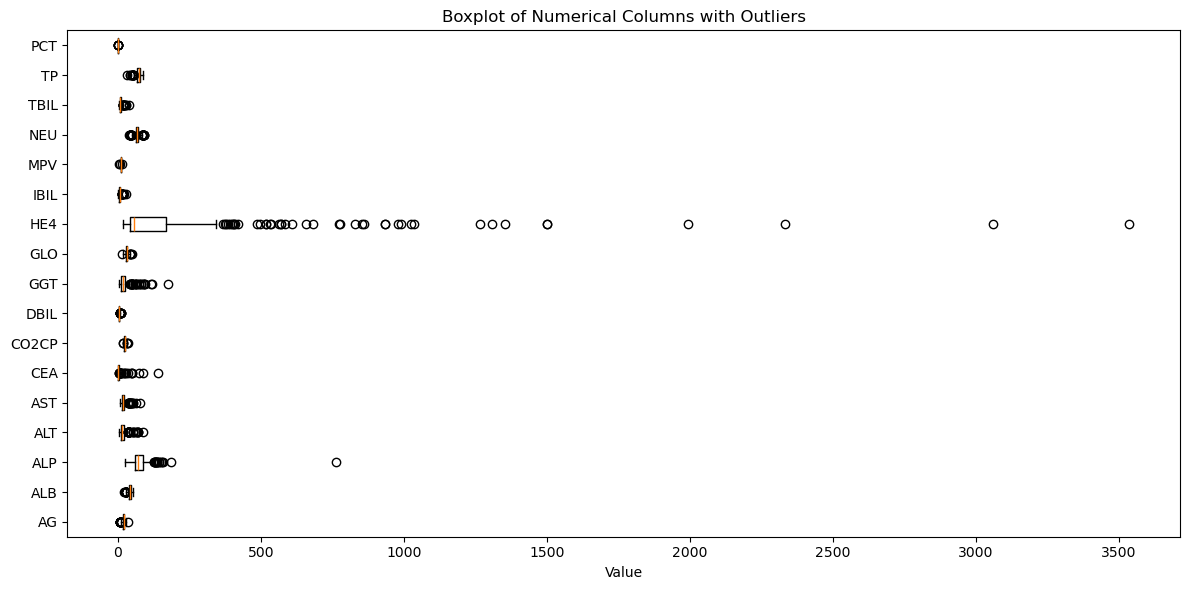

In [196]:
## Check outlier 

import matplotlib.pyplot as plt

# Check for outliers in all numerical columns and plot boxplots
outlier_columns = []
for col in neumerical_Column:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    if not outliers.empty:
        outlier_columns.append(col)
        print(f"Outliers found in column: {col}")

if outlier_columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot([data[col] for col in outlier_columns], labels=outlier_columns, vert=False)
    plt.title("Boxplot of Numerical Columns with Outliers")
    plt.xlabel("Value")
    plt.tight_layout()
    plt.show()
else:
    print("No outlier values found in the specified numerical columns.")

Outlier Fix Summary:
 - AFP: 14 outliers clipped
 - AG: 18 outliers clipped
 - Age: 0 outliers clipped
 - ALB: 14 outliers clipped
 - ALP: 17 outliers clipped
 - ALT: 26 outliers clipped
 - AST: 18 outliers clipped
 - BASO#: 6 outliers clipped
 - BASO%: 3 outliers clipped
 - BUN: 7 outliers clipped
 - Ca: 22 outliers clipped
 - CA125: 36 outliers clipped
 - CA19-9: 31 outliers clipped
 - CEA: 22 outliers clipped
 - CL: 15 outliers clipped
 - CO2CP: 5 outliers clipped
 - CREA: 7 outliers clipped
 - DBIL: 15 outliers clipped
 - EO#: 18 outliers clipped
 - EO%: 19 outliers clipped
 - GGT: 27 outliers clipped
 - GLO: 6 outliers clipped
 - GLU.: 25 outliers clipped
 - HCT: 11 outliers clipped
 - HE4: 43 outliers clipped
 - HGB: 18 outliers clipped
 - IBIL: 11 outliers clipped
 - K: 5 outliers clipped
 - LYM#: 11 outliers clipped
 - LYM%: 0 outliers clipped
 - MCH: 23 outliers clipped
 - MCV: 18 outliers clipped
 - Menopause: 0 outliers clipped
 - Mg: 9 outliers clipped
 - MONO#: 12 outliers

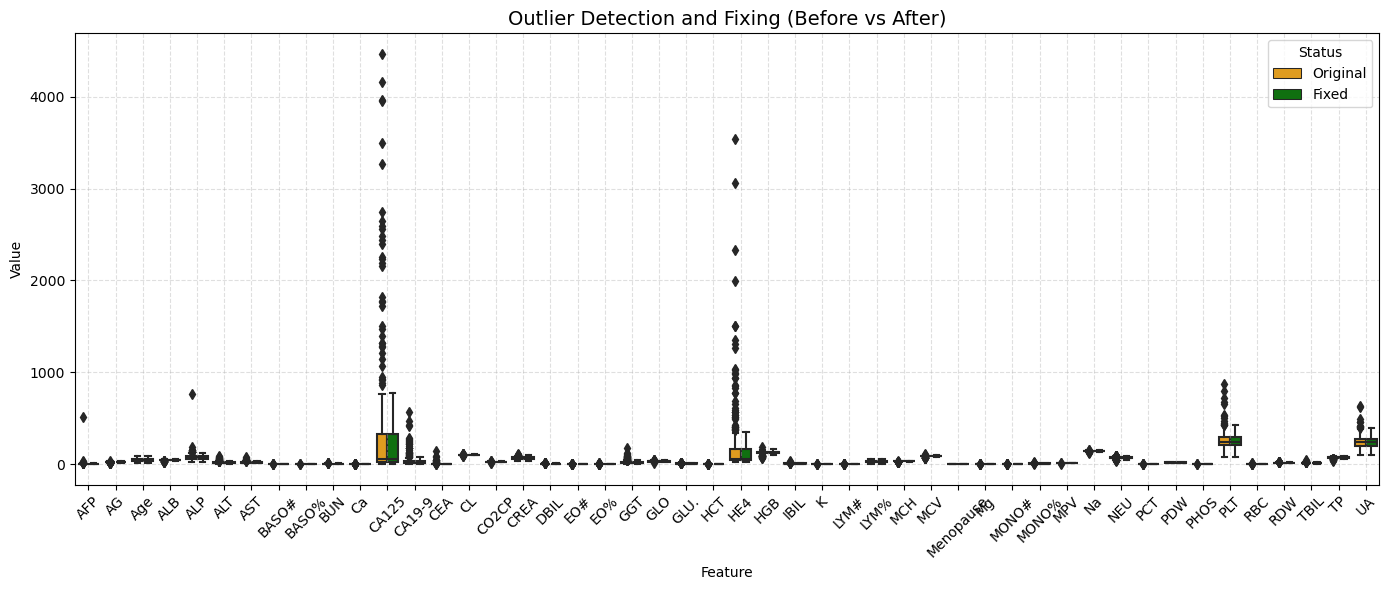

In [197]:
## Handle outlier value : 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.drop(columns=['SUBJECT_ID', 'TYPE'], errors='ignore').select_dtypes(include='number')

def fix_outliers(df):
    df_fixed = df.copy()
    print("Outlier Fix Summary:")
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f" - {col}: {outliers} outliers clipped")
        df_fixed[col] = df[col].clip(lower=lower, upper=upper)
    return df_fixed


clean_data = fix_outliers(numeric_data)


original_melted = numeric_data.melt(var_name='Feature', value_name='Value')
original_melted['Status'] = 'Original'

clean_melted = clean_data.melt(var_name='Feature', value_name='Value')
clean_melted['Status'] = 'Fixed'

combined = pd.concat([original_melted, clean_melted])


plt.figure(figsize=(14, 6))
sns.boxplot(data=combined, x='Feature', y='Value', hue='Status', palette=['orange', 'green'])
plt.title('Outlier Detection and Fixing (Before vs After)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [198]:
data = data.drop(columns='SUBJECT_ID')

### 4. Test (Shapiro, z-test, chi-square)

#### Shapiro-Wilk Test

In [199]:
## Shapiro-Wilk Test

from scipy.stats import shapiro
import numpy as np

thesordValue = 0.05

stat, p = shapiro(data)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)

if p > thesordValue:
    print("Data looks normal")
else:
    print("Data is not normal")


Shapiro-Wilk Test Statistic: 0.258938193321228
p-value: 0.0
Data is not normal


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Z-Test
     -> Positive z ⇒ sample mean > H0_MEAN.
     -> Negative z ⇒ sample mean < H0_MEAN.

In [200]:
data.values.mean()

43.771453903260735

In [201]:
## Z-Test

import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.multitest import multipletests


H0_MEAN = data.values.mean()       
ALPHA   = 0.05


num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
rows = []
for col in num_cols:
    x = data[col].dropna().to_numpy()
    if x.size < 2:         
        continue
    z, p = ztest(x, value=H0_MEAN)          
    rows.append([col, x.size, x.mean(), x.std(ddof=1), z, p])

res = pd.DataFrame(rows, columns=["variable","n","mean","sd","z","p"])


rej, p_fdr, _, _ = multipletests(res["p"], alpha=ALPHA, method="fdr_bh")
res["p_fdr"] = p_fdr
res["significant(FDR 5%)"] = rej


print(res.sort_values("p_fdr").head(20))

 


     variable    n        mean         sd             z    p  p_fdr  \
24        HCT  349    0.383874   0.042177 -19217.630068  0.0    0.0   
26        HGB  349  125.336103  15.534192     98.090293  0.0    0.0   
27       IBIL  349    5.961062   2.910527   -242.690222  0.0    0.0   
28          K  349    4.386447   0.396798  -1854.277410  0.0    0.0   
29       LYM#  349    1.557593   0.561449  -1404.615011  0.0    0.0   
31        MCH  349   28.777192   2.569315   -109.023590  0.0    0.0   
32        MCV  349   88.070201   6.041754    136.974946  0.0    0.0   
33  Menopause  349    0.340974   0.474717  -1709.118899  0.0    0.0   
34         Mg  349    0.982693   0.123643  -6465.073130  0.0    0.0   
35      MONO#  349    0.355158   0.150504  -5389.111372  0.0    0.0   
47         TP  349   71.078761   7.258465     70.282440  0.0    0.0   
36      MONO%  349    5.579083   1.924260   -370.787970  0.0    0.0   
38         Na  349  140.494842   2.860347    631.721356  0.0    0.0   
39    

#### Chi-Square

In [202]:
## Chi-Square Test

import pandas as pd
from scipy.stats import chi2_contingency


target_col = data['TYPE'].replace({0: "Normal", 1: "Cancer"})
target_col = target_col.astype('category')


feature_cols = data.drop(columns=['TYPE']).columns


significant  = 0
significant_col_name = []
No_significant = 0

for feature in feature_cols:
    feature_data = data[feature].astype('category')
    contingency_table = pd.crosstab(feature_data, target_col)

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nFeature: {feature}")
    print("Chi-Square Statistic:", chi2)
    print("Degrees of Freedom:", dof)
    print("p-value:", p)
    
    if p < 0.05:
        significant +=1
        significant_col_name.append(feature)
        print(f"-> Significant association between {feature} and TYPE")
    else:
        No_significant +=1
        print(f"-> No significant association between {feature} and TYPE")

print(f"  Total Significant Coloumn No : {significant}")
print(f"       Significant Column Name : {significant_col_name}")
print(f"Total No significant Column No : {No_significant}")



Feature: AFP
Chi-Square Statistic: 249.79342296909564
Degrees of Freedom: 227
p-value: 0.14299821293585718
-> No significant association between AFP and TYPE

Feature: AG
Chi-Square Statistic: 310.98470661672906
Degrees of Freedom: 307
p-value: 0.42583075948287924
-> No significant association between AG and TYPE

Feature: Age
Chi-Square Statistic: 127.54943956403892
Degrees of Freedom: 61
p-value: 1.308286378062515e-06
-> Significant association between Age and TYPE

Feature: ALB
Chi-Square Statistic: 193.00391013426201
Degrees of Freedom: 172
p-value: 0.13029692881104593
-> No significant association between ALB and TYPE

Feature: ALP
Chi-Square Statistic: 118.74272205762202
Degrees of Freedom: 97
p-value: 0.06620454897987547
-> No significant association between ALP and TYPE

Feature: ALT
Chi-Square Statistic: 39.836421915130344
Degrees of Freedom: 46
p-value: 0.7268760009019987
-> No significant association between ALT and TYPE

Feature: AST
Chi-Square Statistic: 44.47191968337876

### 5. Imbalance
       -> RUS (ENN)
       -> ROS (SMOTE)

In [203]:
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from collections import Counter

X = data.drop('TYPE', axis=1)
y = data['TYPE']

print("Original:", Counter(y))

enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)
print("After ENN:", Counter(y_enn))

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_enn, y_enn)
print("After SMOTE:", Counter(y_smote))


Original: Counter({1: 178, 0: 171})
After ENN: Counter({0: 171, 1: 117})
After SMOTE: Counter({0: 171, 1: 171})


| Technique | Class 0 | Class 1 | Result                             |
| --------- | ------- | ------- | ---------------------------------- |
| Original  | 178    | 171    | Slight imbalance                   |
| ENN       | 171     | 117     | Reduced majority by removing noise |
| SMOTE     | 171     | 171     | Perfect balance via oversampling   |


In [204]:
X_balanced, y_balanced = X_smote, y_smote

### Models

In [205]:
## Fuzzy KNN Model : 

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

class FuzzyKNN(KNeighborsClassifier):
    def __init__(self, n_neighbors=5, fuzzy_m=2, **kwargs):
        super().__init__(n_neighbors=n_neighbors, **kwargs)
        self.fuzzy_m = fuzzy_m

    def predict_fuzzy(self, X):
        neigh_dist, neigh_ind = self.kneighbors(X)
        y_train = self._y
        classes = self.classes_
        proba = np.zeros((X.shape[0], len(classes)))
        for i, (dist, ind) in enumerate(zip(neigh_dist, neigh_ind)):
            weights = 1 / (dist + 1e-8)
            weights = np.power(weights, self.fuzzy_m)
            for idx, c in enumerate(classes):
                proba[i, idx] = np.sum(weights[y_train[ind] == c])
            proba[i] /= np.sum(proba[i])
        return np.argmax(proba, axis=1)

In [206]:
## ROTF Model :

import numpy as np
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

class RotationForest:
    def __init__(self, base_estimator=RandomForestClassifier(), n_estimators=10, feature_subset_size=3, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.feature_subset_size = feature_subset_size
        self.random_state = np.random.RandomState(random_state)
        self.models = []
        self.rotation_matrices = []

    def _rotate_data(self, X):
        n_features = X.shape[1]
        indices = np.arange(n_features)
        self.random_state.shuffle(indices)
        subsets = [indices[i:i + self.feature_subset_size] for i in range(0, n_features, self.feature_subset_size)]

        X_rotated = np.empty_like(X, dtype=float)
        rotation_matrix = np.zeros((n_features, n_features))

        for subset in subsets:
            pca = PCA()
            X_subset = X[:, subset]
            X_pca = pca.fit_transform(X_subset)
            X_rotated[:, subset] = X_pca
            rotation_matrix[np.ix_(subset, subset)] = pca.components_

        return X_rotated, rotation_matrix

    def fit(self, X, y):
        self.models = []
        self.rotation_matrices = []
        for _ in range(self.n_estimators):
            # Rotation step
            X_rotated, rotation_matrix = self._rotate_data(X)

            # Train model
            model = clone(self.base_estimator)
            model.fit(X_rotated, y)

            self.models.append(model)
            self.rotation_matrices.append(rotation_matrix)

    def predict(self, X):
        predictions = []
        for model, rotation_matrix in zip(self.models, self.rotation_matrices):
            X_rotated = X @ rotation_matrix.T  # apply rotation
            predictions.append(model.predict(X_rotated))
        predictions = np.array(predictions)
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)



In [207]:
## Fuzzy Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

class FuzzyRandomForest(RandomForestClassifier):
    def __init__(self, n_estimators=100, 
                 max_depth=None, 
                 min_samples_split=2, 
                 fuzzy_m=2, 
                 random_state=None):
        super().__init__(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=random_state)
        self.fuzzy_m = fuzzy_m

    def predict_fuzzy(self, X):
        # Get probabilities from all trees
        all_proba = np.array([tree.predict_proba(X) for tree in self.estimators_])
        # Fuzzy aggregation (generalized mean)
        fuzzy_proba = np.power(np.mean(np.power(all_proba, self.fuzzy_m), axis=0), 1/self.fuzzy_m)
        return np.argmax(fuzzy_proba, axis=1)

### 6. Feature Selection 
       -> SVD 
       -> PSO
       -> SI
       -> TDO
       -> CSA
       -> HHO
       -> CSS

## Feature Selection with SVD

In [208]:
import pandas as pd
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from collections import Counter


X_svd = X_balanced
y_svd = y_balanced

# Standardize features before SVD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_svd)

# Apply SVD
svd = TruncatedSVD(n_components=16)  
X_svd_fit = svd.fit_transform(X_scaled)


# Show Feature Name :
components = np.abs(svd.components_)  
feature_names = X_svd.columns

feature_importance = components.sum(axis=0)


feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_importance
})

top_features = feature_scores.sort_values(by='Score', ascending=False).head(16)

svd_features = top_features['Feature'].tolist()
print(f"SVD Top 16 Features : {svd_features}")

SVD Top 16 Features : ['EO#', 'EO%', 'Ca', 'AG', 'Na', 'AST', 'ALT', 'PHOS', 'K', 'Mg', 'BASO#', 'CO2CP', 'MCV', 'BASO%', 'CL', 'PDW']


In [239]:
## Hyperparameter Tuning of SVD with Grid Search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


X_svd_grid = X_balanced[svd_features]
y_svd_grid = y_balanced

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Setup GridSearchCV
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_svd_grid, y_svd_grid)

n_estimators_svd = grid_search.best_params_['n_estimators']
max_depth_svd = grid_search.best_params_['max_depth']
min_samples_split_svd = grid_search.best_params_['min_samples_split']

print("Best Parameters from Grid Search:")
print(f"n_estimators: {n_estimators_svd}, max_depth: {max_depth_svd}, min_samples_split: {min_samples_split_svd}")
print("Best Accuracy:", grid_search.best_score_)


Best Parameters from Grid Search:
n_estimators: 300, max_depth: 15, min_samples_split: 8
Best Accuracy: 0.7285592497868713


In [238]:
grid_best_params = grid_search.best_params_['max_depth']
grid_best_params

15

#### Model Building (SVD Feature)
    -> Fuzzy Knn
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [240]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_svd_train, x_svd_test, y_svd_train, y_svd_test = train_test_split(X_svd[svd_features], y_svd, test_size=0.2, random_state=42)

print("Traing x Data Shape: ", x_svd_train.shape)
print("Training y Data Shape : ", y_svd_train.shape)
print("Testing x Data Shape: ", x_svd_test.shape)
print("Testing y Data Shape: ", y_svd_test.shape) 

Traing x Data Shape:  (273, 16)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 16)
Testing y Data Shape:  (69,)


In [211]:
## Fuzzy Knn applying SVD Features:: 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
fuzzy_knn.fit(x_svd_train, y_svd_train)
y_fuzzy_knn_pred = fuzzy_knn.predict_fuzzy(x_svd_test)

svd_fuzzyKnn_confusion_matrix = confusion_matrix(y_svd_test, y_fuzzy_knn_pred)
svd_fuzzyKnn_accuracy = accuracy_score(y_svd_test, y_fuzzy_knn_pred)
svd_fuzzyKnn_precision = precision_score(y_svd_test, y_fuzzy_knn_pred)
svd_fuzzyKnn_recall = recall_score(y_svd_test, y_fuzzy_knn_pred)
svd_fuzzyKnn_f1_score = f1_score(y_svd_test, y_fuzzy_knn_pred)

print("FuzzyKNN on SVD:")
print(f"Confusion Matrix:\n{svd_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {svd_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {svd_fuzzyKnn_precision:.4f}")
print(f"Recall: {svd_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {svd_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on SVD:
Confusion Matrix:
[[19 18]
 [ 4 28]]
Accuracy: 0.6812
Precision: 0.6087
Recall: 0.8750
F1 Score: 0.7179


In [ ]:
## ROTF Applying SVD Features:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_svd, 
                                          max_depth=max_depth_svd, 
                                          min_samples_split=min_samples_split_svd),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

rotf_model.fit(x_svd_train.values, y_svd_train.values)
y_pred = rotf_model.predict(x_svd_test)

# Evaluation
svd_rotf_confusion_matrix = confusion_matrix(y_svd_test, y_pred)
svd_rotf_accuracy = accuracy_score(y_svd_test, y_pred)
svd_rotf_precision = precision_score(y_svd_test, y_pred)
svd_rotf_recall = recall_score(y_svd_test, y_pred)
svd_rotf_f1 = f1_score(y_svd_test, y_pred)  


print("RoTF applying SVD:")
print(f"Confusion Matrix:\n{svd_rotf_confusion_matrix}")
print(f"Accuracy: {svd_rotf_accuracy:.4f}")
print(f"Precision: {svd_rotf_precision:.4f}")
print(f"Recall: {svd_rotf_recall:.4f}")
print(f"F1 Score: {svd_rotf_f1:.4f}")


RoTF applying SVD:
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [242]:
## Fuzzy Random Forest Model applying SVD Features:

model = FuzzyRandomForest(n_estimators=n_estimators_svd, 
                          max_depth=max_depth_svd, 
                          min_samples_split=min_samples_split_svd, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_svd_train, y_svd_train)
y_pred = model.predict_fuzzy(x_svd_test)


svd_frf_confusion_matrix = confusion_matrix(y_svd_test, y_pred)
svd_frf_accuracy = accuracy_score(y_svd_test, y_pred)
svd_frf_precision = precision_score(y_svd_test, y_pred, average='binary')
svd_frf_recall = recall_score(y_svd_test, y_pred, average='binary')
svd_frf_f1_score = f1_score(y_svd_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying SVD Feature selection:")
print(f"confusion_matrix :\n {svd_frf_confusion_matrix}")
print(f" Accuracy :{svd_frf_accuracy:.4f}")
print(f"Precision :{svd_frf_precision:.4f}")
print(f"   Recall :{svd_frf_recall:.4f}")
print(f" F1 Score :{svd_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying SVD Feature selection:
confusion_matrix :
 [[26 11]
 [ 6 26]]
 Accuracy :0.7536
Precision :0.7027
   Recall :0.8125
 F1 Score :0.7536


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [243]:
## Extra Trees Classifier on SVD Features : 

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_svd,
                                max_depth=max_depth_svd,
                                min_samples_split=min_samples_split_svd)
et_model.fit(x_svd_train, y_svd_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_svd_test)

svd_et_confusion_matrix = confusion_matrix(y_svd_test, y_test_pred_et)
svd_et_accuracy = accuracy_score(y_svd_test, y_test_pred_et)
svd_et_precision = precision_score(y_svd_test, y_test_pred_et)
svd_et_recall = recall_score(y_svd_test, y_test_pred_et)
svd_et_f1_score = f1_score(y_svd_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying SVD Features :")
print(f"Confusion Matrix:\n{svd_et_confusion_matrix}")
print(f"Accuracy: {svd_et_accuracy:.4f}")
print(f"Precision: {svd_et_precision:.4f}")     
print(f"Recall: {svd_et_recall:.4f}")
print(f"F1 Score: {svd_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying SVD Features :
Confusion Matrix:
[[26 11]
 [ 6 26]]
Accuracy: 0.7536
Precision: 0.7027
Recall: 0.8125
F1 Score: 0.7536


In [244]:
## Gradient Boosting Classifier on SVD Features

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_svd, 
                                      max_depth=max_depth_svd, 
                                      min_samples_split=min_samples_split_svd)
gb_model.fit(x_svd_train, y_svd_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_svd_test)


# Evaluation on test set
svd_gb_confusion_matrix = confusion_matrix(y_svd_test, y_gb_pred)
svd_gb_accuracy = accuracy_score(y_svd_test, y_gb_pred)
svd_gb_precision = precision_score(y_svd_test, y_gb_pred)
svd_gb_recall = recall_score(y_svd_test, y_gb_pred)
svd_gb_f1 = f1_score(y_svd_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying SVD Features :")
print(f"Confusion Matrix:\n{svd_gb_confusion_matrix}")
print(f"Accuracy: {svd_gb_accuracy:.4f}")
print(f"Precision: {svd_gb_precision:.4f}")
print(f"Recall: {svd_gb_recall:.4f}")
print(f"F1 Score: {svd_gb_f1:.4f}")

GradientBoostingClassifie Performance applying SVD Features :
Confusion Matrix:
[[21 16]
 [10 22]]
Accuracy: 0.6232
Precision: 0.5789
Recall: 0.6875
F1 Score: 0.6286


In [245]:
### LGBMClassifier on SVD Features

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_svd, 
                            max_depth=max_depth_svd, 
                            min_samples_split=min_samples_split_svd)
lgbm_model.fit(x_svd_train, y_svd_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_svd_test)

# Evaluation on test set
svd_lgbm_confusion_matrix = confusion_matrix(y_svd_test, y_lgbm_pred)
svd_lgbm_accuracy = accuracy_score(y_svd_test, y_lgbm_pred)
svd_lgbm_precision = precision_score(y_svd_test, y_lgbm_pred)
svd_lgbm_recall = recall_score(y_svd_test, y_lgbm_pred)
svd_lgbm_f1 = f1_score(y_svd_test, y_lgbm_pred)

print("LGBMClassifier Performance (Test Set):")
print(f"Confusion Matrix:\n{svd_lgbm_confusion_matrix}")
print(f"Accuracy: {svd_lgbm_accuracy:.4f}")
print(f"Precision: {svd_lgbm_precision:.4f}")
print(f"Recall: {svd_lgbm_recall:.4f}")
print(f"F1 Score: {svd_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [246]:
## XGBClassifier on SVD Features

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_svd, 
                          max_depth=max_depth_svd, 
                          min_samples_split=min_samples_split_svd)

xgb_model.fit(x_svd_train, y_svd_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_svd_test)

# Evaluation on test set
svd_xgb_confusion_matrix = confusion_matrix(y_svd_test, y_xgb_pred)
svd_xgb_accuracy = accuracy_score(y_svd_test, y_xgb_pred)
svd_xgb_precision = precision_score(y_svd_test, y_xgb_pred)
svd_xgb_recall = recall_score(y_svd_test, y_xgb_pred)
svd_xgb_f1 = f1_score(y_svd_test, y_xgb_pred)

print("XGBClassifier Performance (Test Set):")
print(f"Confusion Matrix:\n{svd_xgb_confusion_matrix}")
print(f"Accuracy: {svd_xgb_accuracy:.4f}")
print(f"Precision: {svd_xgb_precision:.4f}")
print(f"Recall: {svd_xgb_recall:.4f}")
print(f"F1 Score: {svd_xgb_f1:.4f}")

XGBClassifier Performance (Test Set):
Confusion Matrix:
[[29  8]
 [ 7 25]]
Accuracy: 0.7826
Precision: 0.7576
Recall: 0.7812
F1 Score: 0.7692


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:12:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [247]:
## CatBoostClassifier on SVD Features

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_svd,
    depth=max_depth_svd,
    min_data_in_leaf=min_samples_split_svd,
    verbose=0
)

model.fit(x_svd_train, y_svd_train)
y_cat_pred = model.predict(x_svd_test)

svd_catboost_confusion_matrix = confusion_matrix(y_svd_test, y_cat_pred)
svd_catboost_accuracy_svd = accuracy_score(y_svd_test, y_cat_pred)
svd_catboost_precision_svd = precision_score(y_svd_test, y_cat_pred)
svd_catboost_recall_svd = recall_score(y_svd_test, y_cat_pred) 
svd_catboost_f1_svd = f1_score(y_svd_test, y_cat_pred)

print("CatBoostClassifier Performance (Test Set):")
print(f"Confusion Matrix:\n{svd_catboost_confusion_matrix}")
print(f"Accuracy: {svd_catboost_accuracy_svd:.4f}")
print(f"Precision: {svd_catboost_precision_svd:.4f}")
print(f"Recall: {svd_catboost_recall_svd:.4f}")
print(f"F1 Score: {svd_catboost_f1_svd:.4f}")   

CatBoostClassifier Performance (Test Set):
Confusion Matrix:
[[24 13]
 [ 6 26]]
Accuracy: 0.7246
Precision: 0.6667
Recall: 0.8125
F1 Score: 0.7324


## Feature Selection with PSO

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pyswarm import pso
import numpy as np


X_pso = X_balanced
y_pso = y_balanced

x_array = X.values  

def fitness_func(weights):
    mask = weights > 0.5
    if np.sum(mask) == 0:
        return 1  
    X_selected = x_array[:, mask]
    score = cross_val_score(RandomForestClassifier(), X_selected, y, cv=5).mean()
    return 1 - score

lb = [0] * x_array.shape[1]
ub = [1] * x_array.shape[1]

best_weights, best_score = pso(fitness_func, lb, ub, swarmsize=20, maxiter=10)

selected_features = np.where(best_weights > 0.5)[0]
pso_selected_feature_names = X_pso.columns[selected_features].tolist()

print("Selected Features:", pso_selected_feature_names)
print(f"Total Features Found : {len(pso_selected_feature_names)}")


Stopping search: maximum iterations reached --> 10
Selected Features: ['AG', 'Age', 'AST', 'BASO#', 'BASO%', 'BUN', 'CA125', 'CA19-9', 'CEA', 'CO2CP', 'CREA', 'DBIL', 'GLU.', 'HE4', 'HGB', 'LYM#', 'MCH', 'MCV', 'Menopause', 'MONO#', 'MONO%', 'MPV', 'NEU', 'PDW', 'PLT', 'RBC', 'TP', 'UA']
Total Features Found : 28


In [231]:
## Hyperparameter Tuning PSO with PSO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pyswarm import pso
import numpy as np


x_hp_pso = X_pso[pso_selected_feature_names].values
y_hp_pso = y_pso.values  


def fitness_func(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    score = cross_val_score(model, x_hp_pso, y_hp_pso, cv=5).mean()
    return 1 - score  


lb = [50, 3, 2]
ub = [300, 20, 10]

# Run PSO
best_params, best_score = pso(fitness_func, lb, ub, swarmsize=20, maxiter=10)

# Extract tuned parameters
n_estimators_pso = int(best_params[0])
max_depth_pso = int(best_params[1])
min_samples_split_pso = int(best_params[2])

print("Best Parameters from PSO:")
print(f"n_estimators: {n_estimators_pso}, max_depth: {max_depth_pso}, min_samples_split: {min_samples_split_pso}")

Stopping search: maximum iterations reached --> 10
Best Parameters from PSO:
n_estimators: 174, max_depth: 9, min_samples_split: 3


#### Model Building (PSO Feature)
    -> Fuzzy KNN
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [ ]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_pso_train, x_pso_test, y_pso_train, y_pso_test = train_test_split(X_pso[pso_selected_feature_names], y_pso, test_size=0.2, random_state=42)

print("Traing x Data Shape: ", x_pso_train.shape)
print("Training y Data Shape : ", y_pso_train.shape)
print("Testing x Data Shape: ", x_pso_test.shape)
print("Testing y Data Shape: ", y_pso_test.shape) 

Traing x Data Shape:  (273, 22)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 22)
Testing y Data Shape:  (69,)


In [252]:
## Fuzzy Knn applying PSO Features:: 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

pso_fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
pso_fuzzy_knn.fit(x_pso_train, y_pso_train)
pso_fuzzy_knn_ypred = pso_fuzzy_knn.predict_fuzzy(x_pso_test)

pso_fuzzyKnn_confusion_matrix = confusion_matrix(y_pso_test, pso_fuzzy_knn_ypred)
pso_fuzzyKnn_accuracy = accuracy_score(y_pso_test, pso_fuzzy_knn_ypred)
pso_fuzzyKnn_precision = precision_score(y_pso_test, pso_fuzzy_knn_ypred)
pso_fuzzyKnn_recall = recall_score(y_pso_test, pso_fuzzy_knn_ypred)
pso_fuzzyKnn_f1_score = f1_score(y_pso_test, pso_fuzzy_knn_ypred)

print("FuzzyKNN on PSO:")
print(f"Confusion Matrix:\n{pso_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {pso_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {pso_fuzzyKnn_precision:.4f}")
print(f"Recall: {pso_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {pso_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on PSO:
Confusion Matrix:
[[25 12]
 [ 1 31]]
Accuracy: 0.8116
Precision: 0.7209
Recall: 0.9688
F1 Score: 0.8267


In [253]:
## ROTF Applying PSO Features:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
pso_rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_pso, 
                                          max_depth=max_depth_pso, 
                                          min_samples_split=min_samples_split_pso),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

pso_rotf_model.fit(x_pso_train.values, y_pso_train.values)
pso_y_pred = pso_rotf_model.predict(x_pso_test)

# Evaluation
pso_rotf_confusion_matrix = confusion_matrix(y_pso_test, pso_y_pred)
pso_rotf_accuracy = accuracy_score(y_pso_test, pso_y_pred)
pso_rotf_precision = precision_score(y_pso_test, pso_y_pred)
pso_rotf_recall = recall_score(y_pso_test, pso_y_pred)
pso_rotf_f1 = f1_score(y_pso_test, pso_y_pred)  


print("RoTF applying PSO:")
print(f"Confusion Matrix:\n{svd_rotf_confusion_matrix}")
print(f"Accuracy: {svd_rotf_accuracy:.4f}")
print(f"Precision: {svd_rotf_precision:.4f}")
print(f"Recall: {svd_rotf_recall:.4f}")
print(f"F1 Score: {svd_rotf_f1:.4f}")


RoTF applying PSO:
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
## Fuzzy Random Forest Model applying PSO Features:

model = FuzzyRandomForest(n_estimators=n_estimators_pso, 
                          max_depth=max_depth_pso, 
                          min_samples_split=min_samples_split_pso, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_pso_train, y_pso_train)
y_pred = model.predict_fuzzy(x_pso_test)


pso_frf_confusion_matrix = confusion_matrix(y_pso_test, y_pred)
pso_frf_accuracy = accuracy_score(y_pso_test, y_pred)
pso_frf_precision = precision_score(y_pso_test, y_pred, average='binary')
pso_frf_recall = recall_score(y_pso_test, y_pred, average='binary')
pso_frf_f1_score = f1_score(y_pso_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying PSO Feature selection:")
print(f"confusion_matrix :\n {pso_frf_confusion_matrix}")
print(f" Accuracy :{pso_frf_accuracy:.4f}")
print(f"Precision :{pso_frf_precision:.4f}")
print(f"   Recall :{pso_frf_recall:.4f}")
print(f" F1 Score :{pso_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying PSO Feature selection:
confusion_matrix :
 [[31  6]
 [ 1 31]]
 Accuracy :0.8986
Precision :0.8378
   Recall :0.9688
 F1 Score :0.8986


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [255]:
## Extra Trees Classifier on PSO Features : 

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_pso,
                                max_depth=max_depth_pso,
                                min_samples_split=min_samples_split_pso)
et_model.fit(x_pso_train, y_pso_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_pso_test)

pso_et_confusion_matrix = confusion_matrix(y_pso_test, y_test_pred_et)
pso_et_accuracy = accuracy_score(y_pso_test, y_test_pred_et)
pso_et_precision = precision_score(y_pso_test, y_test_pred_et)
pso_et_recall = recall_score(y_pso_test, y_test_pred_et)
pso_et_f1_score = f1_score(y_pso_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying PSO Features :")
print(f"Confusion Matrix:\n{pso_et_confusion_matrix}")
print(f"Accuracy: {pso_et_accuracy:.4f}")
print(f"Precision: {pso_et_precision:.4f}")     
print(f"Recall: {pso_et_recall:.4f}")
print(f"F1 Score: {pso_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying PSO Features :
Confusion Matrix:
[[30  7]
 [ 0 32]]
Accuracy: 0.8986
Precision: 0.8205
Recall: 1.0000
F1 Score: 0.9014


In [256]:
## Gradient Boosting Classifier on PSO Features

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_pso, 
                                      max_depth=max_depth_pso, 
                                      min_samples_split=min_samples_split_pso)
gb_model.fit(x_pso_train, y_pso_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_pso_test)


# Evaluation on test set
pso_gb_confusion_matrix = confusion_matrix(y_pso_test, y_gb_pred)
pso_gb_accuracy = accuracy_score(y_pso_test, y_gb_pred)
pso_gb_precision = precision_score(y_pso_test, y_gb_pred)
pso_gb_recall = recall_score(y_pso_test, y_gb_pred)
pso_gb_f1 = f1_score(y_pso_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying SVD Features :")
print(f"Confusion Matrix:\n{pso_gb_confusion_matrix}")
print(f"Accuracy: {pso_gb_accuracy:.4f}")
print(f"Precision: {pso_gb_precision:.4f}")
print(f"Recall: {pso_gb_recall:.4f}")
print(f"F1 Score: {pso_gb_f1:.4f}")

GradientBoostingClassifie Performance applying SVD Features :
Confusion Matrix:
[[32  5]
 [ 3 29]]
Accuracy: 0.8841
Precision: 0.8529
Recall: 0.9062
F1 Score: 0.8788


In [259]:
### LGBMClassifier on PSO Features

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_pso, 
                            max_depth=max_depth_pso, 
                            min_samples_split=min_samples_split_pso)
lgbm_model.fit(x_pso_train, y_pso_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_pso_test)

# Evaluation on test set
pso_lgbm_confusion_matrix = confusion_matrix(y_pso_test, y_lgbm_pred)
pso_lgbm_accuracy = accuracy_score(y_pso_test, y_lgbm_pred)
pso_lgbm_precision = precision_score(y_pso_test, y_lgbm_pred)
pso_lgbm_recall = recall_score(y_pso_test, y_lgbm_pred)
pso_lgbm_f1 = f1_score(y_pso_test, y_lgbm_pred)

print("LGBMClassifier Performance Applying PCO:")
print(f"Confusion Matrix:\n{pso_lgbm_confusion_matrix}")
print(f"Accuracy: {pso_lgbm_accuracy:.4f}")
print(f"Precision: {pso_lgbm_precision:.4f}")
print(f"Recall: {pso_lgbm_recall:.4f}")
print(f"F1 Score: {pso_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1475
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [260]:
### XGBClassifier on PSO Features

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_pso, 
                          max_depth=max_depth_pso, 
                          min_samples_split=min_samples_split_pso)

xgb_model.fit(x_pso_train, y_pso_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_pso_test)

# Evaluation on test set
pso_xgb_confusion_matrix = confusion_matrix(y_pso_test, y_xgb_pred)
pso_xgb_accuracy = accuracy_score(y_pso_test, y_xgb_pred)
pso_xgb_precision = precision_score(y_pso_test, y_xgb_pred)
pso_xgb_recall = recall_score(y_pso_test, y_xgb_pred)
pso_xgb_f1 = f1_score(y_pso_test, y_xgb_pred)

print("XGBClassifier Performance applying PSO ):")
print(f"Confusion Matrix:\n{pso_xgb_confusion_matrix}")
print(f"Accuracy: {pso_xgb_accuracy:.4f}")
print(f"Precision: {pso_xgb_precision:.4f}")
print(f"Recall: {pso_xgb_recall:.4f}")
print(f"F1 Score: {pso_xgb_f1:.4f}")

XGBClassifier Performance applying PSO ):
Confusion Matrix:
[[31  6]
 [ 1 31]]
Accuracy: 0.8986
Precision: 0.8378
Recall: 0.9688
F1 Score: 0.8986


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [19:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [261]:
## CatBoostClassifier on PSO Features

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_pso,
    depth=max_depth_pso,
    min_data_in_leaf=min_samples_split_pso,
    verbose=0
)

model.fit(x_pso_train, y_pso_train)
y_cat_pred = model.predict(x_pso_test)

pso_catboost_confusion_matrix = confusion_matrix(y_pso_test, y_cat_pred)
pso_catboost_accuracy_svd = accuracy_score(y_pso_test, y_cat_pred)
pso_catboost_precision_svd = precision_score(y_pso_test, y_cat_pred)
pso_catboost_recall_svd = recall_score(y_pso_test, y_cat_pred) 
pso_catboost_f1_svd = f1_score(y_pso_test, y_cat_pred)

print("CatBoostClassifier Performance :")
print(f"Confusion Matrix:\n{pso_catboost_confusion_matrix}")
print(f"Accuracy: {pso_catboost_accuracy_svd:.4f}")
print(f"Precision: {pso_catboost_precision_svd:.4f}")
print(f"Recall: {pso_catboost_recall_svd:.4f}")
print(f"F1 Score: {pso_catboost_f1_svd:.4f}")   

CatBoostClassifier Performance :
Confusion Matrix:
[[28  9]
 [ 1 31]]
Accuracy: 0.8551
Precision: 0.7750
Recall: 0.9688
F1 Score: 0.8611


## Feature Selection with ACO 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np



class ACOFeatureSelector:
    def __init__(self, X, y, n_ants=10, n_iterations=10, evaporation_rate=0.3, alpha=1, beta=2):
        self.X = X.values if hasattr(X, 'values') else X
        self.y = y.values if hasattr(y, 'values') else y
        self.n_features = self.X.shape[1]
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones(self.n_features)
        self.best_features = None
        self.best_score = 0

    def _fitness(self, feature_mask):
        if np.sum(feature_mask) == 0:
            return 0
        X_selected = self.X[:, feature_mask == 1]
        score = cross_val_score(RandomForestClassifier(), X_selected, self.y, cv=5).mean()
        return score

    def run(self):
        for it in range(self.n_iterations):
            solutions = []
            scores = []
            for ant in range(self.n_ants):
                prob = (self.pheromone ** self.alpha)
                prob = prob / prob.sum()
                feature_mask = np.random.rand(self.n_features) < prob
                if np.sum(feature_mask) == 0:
                    feature_mask[np.random.randint(0, self.n_features)] = 1
                score = self._fitness(feature_mask)
                solutions.append(feature_mask)
                scores.append(score)
                if score > self.best_score:
                    self.best_score = score
                    self.best_features = feature_mask.copy()
            self.pheromone *= (1 - self.evaporation_rate)
            for mask, score in zip(solutions, scores):
                self.pheromone += mask * score
        return np.where(self.best_features == 1)[0], self.best_score


X_aco = X_balanced
y_aco = y_balanced  

aco = ACOFeatureSelector(X_aco, y_aco, n_ants=15, n_iterations=15)
selected_idx, best_score = aco.run()
aco_selected_feature_names = X_aco.columns[selected_idx].tolist()

print("ACO Selected Features:", aco_selected_feature_names)
print(f"Total Features Found : {len(aco_selected_feature_names)}")

ACO Selected Features: ['AG', 'HE4', 'PDW']
Total Features Found : 3


In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# ACO for hyperparameter tuning
class ACOHyperparameterTuner:
    def __init__(self, func, n_ants=10, n_iterations=10, lb=None, ub=None, evaporation_rate=0.3, alpha=1, beta=2):
        self.func = func
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.dim = len(lb)
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta
        self.pheromone = np.ones(self.dim)
        self.best_params = None
        self.best_score = np.inf

    def run(self):
        for it in range(self.n_iterations):
            solutions = []
            scores = []
            for ant in range(self.n_ants):
                prob = (self.pheromone ** self.alpha)
                prob = prob / prob.sum()
                params = []
                for d in range(self.dim):
                    # Sample uniformly within bounds, bias by pheromone
                    val = np.random.uniform(self.lb[d], self.ub[d])
                    if np.random.rand() < prob[d]:
                        params.append(val)
                    else:
                        params.append(np.random.uniform(self.lb[d], self.ub[d]))
                params = np.array(params)
                score = self.func(params)
                solutions.append(params)
                scores.append(score)
                if score < self.best_score:
                    self.best_score = score
                    self.best_params = params.copy()
            self.pheromone *= (1 - self.evaporation_rate)
            for params, score in zip(solutions, scores):
                self.pheromone += (1 - score) * (params - self.lb) / (self.ub - self.lb + 1e-8)
        return self.best_params, self.best_score

# Prepare data using ACO-selected features
x_hp_aco = X_balanced[aco_selected_feature_names].values
y_hp_aco = y_balanced.values

def aco_fitness(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    score = cross_val_score(clf, x_hp_aco, y_hp_aco, cv=5, scoring='accuracy').mean()
    return 1 - score

lb = [50, 3, 2]
ub = [300, 20, 10]

aco_tuner = ACOHyperparameterTuner(aco_fitness, n_ants=15, n_iterations=10, lb=lb, ub=ub)
best_aco_params, best_aco_score = aco_tuner.run()

n_estimators_aco = int(best_aco_params[0])
max_depth_aco = int(best_aco_params[1])
min_samples_split_aco = int(best_aco_params[2])

print("Best Parameters from ACO:")
print(f"n_estimators: {n_estimators_aco}, max_depth: {max_depth_aco}, min_samples_split: {min_samples_split_aco}")
print("Best Accuracy:", 1 - best_aco_score)

Best Parameters from ACO:
n_estimators: 55, max_depth: 12, min_samples_split: 7
Best Accuracy: 0.8684143222506394


#### Model Building (ACO Feature)
    -> Fuzzy KNN
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [266]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_aco_train, x_aco_test, y_aco_train, y_aco_test = train_test_split(X_aco[aco_selected_feature_names], y_aco, test_size=0.2, random_state=42)

print("Traing x Data Shape: ", x_aco_train.shape)
print("Training y Data Shape : ", y_aco_train.shape)
print("Testing x Data Shape: ", x_aco_test.shape)
print("Testing y Data Shape: ", y_aco_test.shape) 

Traing x Data Shape:  (273, 3)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 3)
Testing y Data Shape:  (69,)


In [346]:
## Fuzzy Knn applying ACO Features::

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

aco_fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
aco_fuzzy_knn.fit(x_aco_train, y_aco_train)
aco_fuzzy_knn_ypred = aco_fuzzy_knn.predict_fuzzy(x_aco_test)

aco_fuzzyKnn_confusion_matrix = confusion_matrix(y_aco_test, aco_fuzzy_knn_ypred)
aco_fuzzyKnn_accuracy = accuracy_score(y_aco_test, aco_fuzzy_knn_ypred)
aco_fuzzyKnn_precision = precision_score(y_aco_test, aco_fuzzy_knn_ypred)
aco_fuzzyKnn_recall = recall_score(y_aco_test, aco_fuzzy_knn_ypred)
aco_fuzzyKnn_f1_score = f1_score(y_aco_test, aco_fuzzy_knn_ypred)

print("FuzzyKNN on ACO:")
print(f"Confusion Matrix:\n{aco_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {aco_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {aco_fuzzyKnn_precision:.4f}")
print(f"Recall: {aco_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {aco_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on ACO:
Confusion Matrix:
[[27 10]
 [ 1 31]]
Accuracy: 0.8406
Precision: 0.7561
Recall: 0.9688
F1 Score: 0.8493


In [274]:
## ROTF Applying ACO Features:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_aco, 
                                          max_depth=max_depth_aco, 
                                          min_samples_split=min_samples_split_aco),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

rotf_model.fit(x_aco_train.values, y_aco_train.values)
y_pred = rotf_model.predict(x_aco_test)

# Evaluation
aco_rotf_confusion_matrix = confusion_matrix(y_aco_test, y_pred)
aco_rotf_accuracy = accuracy_score(y_aco_test, y_pred)
aco_rotf_precision = precision_score(y_aco_test, y_pred)
aco_rotf_recall = recall_score(y_aco_test, y_pred)
aco_rotf_f1 = f1_score(y_aco_test, y_pred)  


print("RoTF applying ACO:")
print(f"Confusion Matrix:\n{aco_rotf_confusion_matrix}")
print(f"Accuracy: {aco_rotf_accuracy:.4f}")
print(f"Precision: {aco_rotf_precision:.4f}")
print(f"Recall: {aco_rotf_recall:.4f}")
print(f"F1 Score: {aco_rotf_f1:.4f}")


RoTF applying ACO:
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [273]:
## Fuzzy Random Forest Model applying ACO Features::
model = FuzzyRandomForest(n_estimators=n_estimators_aco, 
                          max_depth=max_depth_aco, 
                          min_samples_split=min_samples_split_aco, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_aco_train, y_aco_train)
y_pred = model.predict_fuzzy(x_aco_test)


aco_frf_confusion_matrix = confusion_matrix(y_aco_test, y_pred)
aco_frf_accuracy = accuracy_score(y_aco_test, y_pred)
aco_frf_precision = precision_score(y_aco_test, y_pred, average='binary')
aco_frf_recall = recall_score(y_aco_test, y_pred, average='binary')
aco_frf_f1_score = f1_score(y_aco_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying ACO Feature selection:")
print(f"confusion_matrix :\n {aco_frf_confusion_matrix}")
print(f" Accuracy :{aco_frf_accuracy:.4f}")
print(f"Precision :{aco_frf_precision:.4f}")
print(f"   Recall :{aco_frf_recall:.4f}")
print(f" F1 Score :{aco_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying ACO Feature selection:
confusion_matrix :
 [[23 14]
 [ 1 31]]
 Accuracy :0.7826
Precision :0.6889
   Recall :0.9688
 F1 Score :0.8052


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [272]:
## Extra Trees Classifier on ACO Features ::

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_aco,
                                max_depth=max_depth_aco,
                                min_samples_split=min_samples_split_aco)
et_model.fit(x_aco_train, y_aco_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_aco_test)

aco_et_confusion_matrix = confusion_matrix(y_aco_test, y_test_pred_et)
aco_et_accuracy = accuracy_score(y_aco_test, y_test_pred_et)
aco_et_precision = precision_score(y_aco_test, y_test_pred_et)
aco_et_recall = recall_score(y_aco_test, y_test_pred_et)
aco_et_f1_score = f1_score(y_aco_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying ACO Features :")
print(f"Confusion Matrix:\n{aco_et_confusion_matrix}")
print(f"Accuracy: {aco_et_accuracy:.4f}")
print(f"Precision: {aco_et_precision:.4f}")     
print(f"Recall: {aco_et_recall:.4f}")
print(f"F1 Score: {aco_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying ACO Features :
Confusion Matrix:
[[25 12]
 [ 1 31]]
Accuracy: 0.8116
Precision: 0.7209
Recall: 0.9688
F1 Score: 0.8267


In [275]:
## Gradient Boosting Classifier on ACO Features ::

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_aco, 
                                      max_depth=max_depth_aco, 
                                      min_samples_split=min_samples_split_aco)
gb_model.fit(x_aco_train, y_aco_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_aco_test)


# Evaluation on test set
aco_gb_confusion_matrix = confusion_matrix(y_aco_test, y_gb_pred)
aco_gb_accuracy = accuracy_score(y_aco_test, y_gb_pred)
aco_gb_precision = precision_score(y_aco_test, y_gb_pred)
aco_gb_recall = recall_score(y_aco_test, y_gb_pred)
aco_gb_f1 = f1_score(y_aco_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying ACO Features :")
print(f"Confusion Matrix:\n{aco_gb_confusion_matrix}")
print(f"Accuracy: {aco_gb_accuracy:.4f}")
print(f"Precision: {aco_gb_precision:.4f}")
print(f"Recall: {aco_gb_recall:.4f}")
print(f"F1 Score: {aco_gb_f1:.4f}")

GradientBoostingClassifie Performance applying ACO Features :
Confusion Matrix:
[[29  8]
 [ 2 30]]
Accuracy: 0.8551
Precision: 0.7895
Recall: 0.9375
F1 Score: 0.8571


In [276]:
## LGBMClassifier on ACO Features ::

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_aco, 
                            max_depth=max_depth_aco, 
                            min_samples_split=min_samples_split_aco)
lgbm_model.fit(x_aco_train, y_aco_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_aco_test)

# Evaluation on test set
aco_lgbm_confusion_matrix = confusion_matrix(y_aco_test, y_lgbm_pred)
aco_lgbm_accuracy = accuracy_score(y_aco_test, y_lgbm_pred)
aco_lgbm_precision = precision_score(y_aco_test, y_lgbm_pred)
aco_lgbm_recall = recall_score(y_aco_test, y_lgbm_pred)
aco_lgbm_f1 = f1_score(y_aco_test, y_lgbm_pred)

print("LGBMClassifier Performance Applying ACO:")
print(f"Confusion Matrix:\n{aco_lgbm_confusion_matrix}")
print(f"Accuracy: {aco_lgbm_accuracy:.4f}")
print(f"Precision: {aco_lgbm_precision:.4f}")
print(f"Recall: {aco_lgbm_recall:.4f}")
print(f"F1 Score: {aco_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [277]:
## XGBClassifier on ACO Features ::

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_aco, 
                          max_depth=max_depth_aco, 
                          min_samples_split=min_samples_split_aco)

xgb_model.fit(x_aco_train, y_aco_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_aco_test)

# Evaluation on test set
aco_xgb_confusion_matrix = confusion_matrix(y_aco_test, y_xgb_pred)
aco_xgb_accuracy = accuracy_score(y_aco_test, y_xgb_pred)
aco_xgb_precision = precision_score(y_aco_test, y_xgb_pred)
aco_xgb_recall = recall_score(y_aco_test, y_xgb_pred)
aco_xgb_f1 = f1_score(y_aco_test, y_xgb_pred)

print("XGBClassifier Performance applying ACO ):")
print(f"Confusion Matrix:\n{aco_xgb_confusion_matrix}")
print(f"Accuracy: {aco_xgb_accuracy:.4f}")
print(f"Precision: {aco_xgb_precision:.4f}")
print(f"Recall: {aco_xgb_recall:.4f}")
print(f"F1 Score: {aco_xgb_f1:.4f}")

XGBClassifier Performance applying ACO ):
Confusion Matrix:
[[24 13]
 [ 1 31]]
Accuracy: 0.7971
Precision: 0.7045
Recall: 0.9688
F1 Score: 0.8158


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [11:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [279]:
## CatBoostClassifier on ACO Features

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_aco,
    depth=max_depth_aco,
    min_data_in_leaf=min_samples_split_aco,
    verbose=0
)

model.fit(x_aco_train, y_aco_train)
y_cat_pred = model.predict(x_aco_test)

aco_catboost_confusion_matrix = confusion_matrix(y_aco_test, y_cat_pred)
aco_catboost_accuracy_svd = accuracy_score(y_aco_test, y_cat_pred)
aco_catboost_precision_svd = precision_score(y_aco_test, y_cat_pred)
aco_catboost_recall_svd = recall_score(y_aco_test, y_cat_pred) 
aco_catboost_f1_svd = f1_score(y_aco_test, y_cat_pred)

print("CatBoostClassifier Performance :")
print(f"Confusion Matrix:\n{aco_catboost_confusion_matrix}")
print(f"Accuracy: {aco_catboost_accuracy_svd:.4f}")
print(f"Precision: {aco_catboost_precision_svd:.4f}")
print(f"Recall: {aco_catboost_recall_svd:.4f}")
print(f"F1 Score: {aco_catboost_f1_svd:.4f}")   

CatBoostClassifier Performance :
Confusion Matrix:
[[24 13]
 [ 1 31]]
Accuracy: 0.7971
Precision: 0.7045
Recall: 0.9688
F1 Score: 0.8158


## Feature Selection with SI

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pyswarm import pso
import numpy as np


X_si = X_balanced  
y_si = y_balanced

x_array = X_si.values

def fitness_func(weights):
    mask = weights > 0.5
    if np.sum(mask) == 0:
        return 1  
    X_selected = x_array[:, mask]
    score = cross_val_score(RandomForestClassifier(), X_selected, y_si, cv=5).mean()
    return 1 - score

lb = [0] * x_array.shape[1]
ub = [1] * x_array.shape[1]

best_weights, best_score = pso(fitness_func, lb, ub, swarmsize=20, maxiter=10)

selected_features = np.where(best_weights > 0.5)[0]
si_selected_feature_names = X_si.columns[selected_features].tolist()

print("SI Selected Features:", si_selected_feature_names)
print(f"Total Features Found : {len(si_selected_feature_names)}")

Stopping search: maximum iterations reached --> 10
SI Selected Features: ['Age', 'ALB', 'ALP', 'BUN', 'CA125', 'CA19-9', 'CEA', 'CREA', 'DBIL', 'EO#', 'GLO', 'HE4', 'HGB', 'K', 'LYM%', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'NEU', 'PCT', 'PLT', 'RBC', 'UA']
Total Features Found : 25


In [ ]:
## Hyperparameter Tuning SI with SI: 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pyswarm import pso
import numpy as np


# Prepare data using SI-selected features
x_hp_si = X_balanced[si_selected_feature_names].values
y_hp_si = y_balanced.values

def si_fitness(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    score = cross_val_score(clf, x_hp_si, y_hp_si, cv=5, scoring='accuracy').mean()
    return 1 - score

lb = [50, 3, 2]
ub = [300, 20, 10]

best_params, best_score = pso(si_fitness, lb, ub, swarmsize=20, maxiter=10)

n_estimators_si = int(best_params[0])
max_depth_si = int(best_params[1])
min_samples_split_si = int(best_params[2])

print("Best Parameters from SI:")
print(f"n_estimators: {n_estimators_si}, max_depth: {max_depth_si}, min_samples_split: {min_samples_split_si}")
print("Best Accuracy:", 1 - best_score)

Stopping search: maximum iterations reached --> 10
Best Parameters from SI PSO:
n_estimators: 300, max_depth: 20, min_samples_split: 7
Best Accuracy: 0.9474424552429668


#### Model Building (SI Feature)
    -> Fuzzy KNN
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [281]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_si_train, x_si_test, y_si_train, y_si_test = train_test_split(X_si[si_selected_feature_names],y_si, test_size=0.2, random_state=42)

print("Traing x Data Shape: ", x_si_train.shape)
print("Training y Data Shape : ", y_si_train.shape)
print("Testing x Data Shape: ", x_si_test.shape)
print("Testing y Data Shape: ", y_si_test.shape) 

Traing x Data Shape:  (273, 25)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 25)
Testing y Data Shape:  (69,)


In [282]:
## Fuzzy Knn applying SI Features::

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
fuzzy_knn.fit(x_si_train, y_si_train)
fuzzy_knn_ypred = fuzzy_knn.predict_fuzzy(x_si_test)

si_fuzzyKnn_confusion_matrix = confusion_matrix(y_si_test, fuzzy_knn_ypred)
si_fuzzyKnn_accuracy = accuracy_score(y_si_test, fuzzy_knn_ypred)
si_fuzzyKnn_precision = precision_score(y_si_test, fuzzy_knn_ypred)
si_fuzzyKnn_recall = recall_score(y_si_test, fuzzy_knn_ypred)
si_fuzzyKnn_f1_score = f1_score(y_si_test, fuzzy_knn_ypred)

print("FuzzyKNN on SI:")
print(f"Confusion Matrix:\n{si_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {si_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {si_fuzzyKnn_precision:.4f}")
print(f"Recall: {si_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {si_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on SI:
Confusion Matrix:
[[28  9]
 [ 1 31]]
Accuracy: 0.8551
Precision: 0.7750
Recall: 0.9688
F1 Score: 0.8611


In [285]:
## ROTF Applying SI Features:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_si, 
                                          max_depth=max_depth_si, 
                                          min_samples_split=min_samples_split_si),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

rotf_model.fit(x_si_train.values, y_si_train.values)
y_pred = rotf_model.predict(x_si_test)

# Evaluation
si_rotf_confusion_matrix = confusion_matrix(y_si_test, y_pred)
si_rotf_accuracy = accuracy_score(y_si_test, y_pred)
si_rotf_precision = precision_score(y_si_test, y_pred)
si_rotf_recall = recall_score(y_si_test, y_pred)
si_rotf_f1 = f1_score(y_si_test, y_pred)  


print("RoTF applying SI :")
print(f"Confusion Matrix:\n{si_rotf_confusion_matrix}")
print(f"Accuracy: {si_rotf_accuracy:.4f}")
print(f"Precision: {si_rotf_precision:.4f}")
print(f"Recall: {si_rotf_recall:.4f}")
print(f"F1 Score: {si_rotf_f1:.4f}")


RoTF applying SI :
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [287]:
## Fuzzy Random Forest Model applying SI Features::

model = FuzzyRandomForest(n_estimators=n_estimators_si, 
                          max_depth=max_depth_si, 
                          min_samples_split=min_samples_split_si, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_si_train, y_si_train)
y_pred = model.predict_fuzzy(x_si_test)


si_frf_confusion_matrix = confusion_matrix(y_si_test, y_pred)
si_frf_accuracy = accuracy_score(y_si_test, y_pred)
si_frf_precision = precision_score(y_si_test, y_pred, average='binary')
si_frf_recall = recall_score(y_si_test, y_pred, average='binary')
si_frf_f1_score = f1_score(y_si_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying SI Feature selection:")
print(f"confusion_matrix :\n {si_frf_confusion_matrix}")
print(f" Accuracy :{si_frf_accuracy:.4f}")
print(f"Precision :{si_frf_precision:.4f}")
print(f"   Recall :{si_frf_recall:.4f}")
print(f" F1 Score :{si_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying SI Feature selection:
confusion_matrix :
 [[32  5]
 [ 1 31]]
 Accuracy :0.9130
Precision :0.8611
   Recall :0.9688
 F1 Score :0.9118


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [288]:
## Extra Trees Classifier on SI Features :

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_si,
                                max_depth=max_depth_si,
                                min_samples_split=min_samples_split_si)
et_model.fit(x_si_train, y_si_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_si_test)

si_et_confusion_matrix = confusion_matrix(y_si_test, y_test_pred_et)
si_et_accuracy = accuracy_score(y_si_test, y_test_pred_et)
si_et_precision = precision_score(y_si_test, y_test_pred_et)
si_et_recall = recall_score(y_si_test, y_test_pred_et)
si_et_f1_score = f1_score(y_si_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying SI Features :")
print(f"Confusion Matrix:\n{si_et_confusion_matrix}")
print(f"Accuracy: {si_et_accuracy:.4f}")
print(f"Precision: {si_et_precision:.4f}")     
print(f"Recall: {si_et_recall:.4f}")
print(f"F1 Score: {si_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying SI Features :
Confusion Matrix:
[[31  6]
 [ 1 31]]
Accuracy: 0.8986
Precision: 0.8378
Recall: 0.9688
F1 Score: 0.8986


In [289]:
## Gradient Boosting Classifier on SI Features:: 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_si, 
                                      max_depth=max_depth_si, 
                                      min_samples_split=min_samples_split_si)
gb_model.fit(x_si_train, y_si_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_si_test)


# Evaluation on test set
si_gb_confusion_matrix = confusion_matrix(y_si_test, y_gb_pred)
si_gb_accuracy = accuracy_score(y_si_test, y_gb_pred)
si_gb_precision = precision_score(y_si_test, y_gb_pred)
si_gb_recall = recall_score(y_si_test, y_gb_pred)
si_gb_f1 = f1_score(y_si_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying SI Features :")
print(f"Confusion Matrix:\n{si_gb_confusion_matrix}")
print(f"Accuracy: {si_gb_accuracy:.4f}")
print(f"Precision: {si_gb_precision:.4f}")
print(f"Recall: {si_gb_recall:.4f}")
print(f"F1 Score: {si_gb_f1:.4f}")

GradientBoostingClassifie Performance applying SI Features :
Confusion Matrix:
[[31  6]
 [ 4 28]]
Accuracy: 0.8551
Precision: 0.8235
Recall: 0.8750
F1 Score: 0.8485


In [294]:
## LGBMClassifier on SI Features ::

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_si, 
                            max_depth=max_depth_si, 
                            min_samples_split=min_samples_split_si)
lgbm_model.fit(x_si_train, y_si_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_si_test)

# Evaluation on test set
si_lgbm_confusion_matrix = confusion_matrix(y_si_test, y_lgbm_pred)
si_lgbm_accuracy = accuracy_score(y_si_test, y_lgbm_pred)
si_lgbm_precision = precision_score(y_si_test, y_lgbm_pred)
si_lgbm_recall = recall_score(y_si_test, y_lgbm_pred)
si_lgbm_f1 = f1_score(y_si_test, y_lgbm_pred)

print("LGBMClassifier Performance Applying SI :")
print(f"Confusion Matrix:\n{si_lgbm_confusion_matrix}")
print(f"Accuracy: {si_lgbm_accuracy:.4f}")
print(f"Precision: {si_lgbm_precision:.4f}")
print(f"Recall: {si_lgbm_recall:.4f}")
print(f"F1 Score: {si_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1728
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [295]:
## XGBClassifier on SI Features ::

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_si, 
                          max_depth=max_depth_si, 
                          min_samples_split=min_samples_split_si)

xgb_model.fit(x_si_train, y_si_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_si_test)

# Evaluation on test set
si_xgb_confusion_matrix = confusion_matrix(y_si_test, y_xgb_pred)
si_xgb_accuracy = accuracy_score(y_si_test, y_xgb_pred)
si_xgb_precision = precision_score(y_si_test, y_xgb_pred)
si_xgb_recall = recall_score(y_si_test, y_xgb_pred)
si_xgb_f1 = f1_score(y_si_test, y_xgb_pred)

print("XGBClassifier Performance applying SI ):")
print(f"Confusion Matrix:\n{si_xgb_confusion_matrix}")
print(f"Accuracy: {si_xgb_accuracy:.4f}")
print(f"Precision: {si_xgb_precision:.4f}")
print(f"Recall: {si_xgb_recall:.4f}")
print(f"F1 Score: {si_xgb_f1:.4f}")

XGBClassifier Performance applying SI ):
Confusion Matrix:
[[30  7]
 [ 1 31]]
Accuracy: 0.8841
Precision: 0.8158
Recall: 0.9688
F1 Score: 0.8857


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:05:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [298]:
## CatBoostClassifier on SI Features

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_si,
    depth=min(max_depth_si, 16),  # CatBoost max depth is 16
    min_data_in_leaf=min_samples_split_si,
    verbose=0
)

model.fit(x_si_train, y_si_train)
y_cat_pred = model.predict(x_si_test)

si_catboost_confusion_matrix = confusion_matrix(y_si_test, y_cat_pred)
si_catboost_accuracy_svd = accuracy_score(y_si_test, y_cat_pred)
si_catboost_precision_svd = precision_score(y_si_test, y_cat_pred)
si_catboost_recall_svd = recall_score(y_si_test, y_cat_pred) 
si_catboost_f1_svd = f1_score(y_si_test, y_cat_pred)

print("CatBoostClassifier Performance SI features :")
print(f"Confusion Matrix:\n{si_catboost_confusion_matrix}")
print(f"Accuracy: {si_catboost_accuracy_svd:.4f}")
print(f"Precision: {si_catboost_precision_svd:.4f}")
print(f"Recall: {si_catboost_recall_svd:.4f}")
print(f"F1 Score: {si_catboost_f1_svd:.4f}")   

CatBoostClassifier Performance SI features :
Confusion Matrix:
[[27 10]
 [ 0 32]]
Accuracy: 0.8551
Precision: 0.7619
Recall: 1.0000
F1 Score: 0.8649


## Feature Selection With TDO

In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# TDO (Three-Dimensional Optimization) for feature selection (simplified metaheuristic)
class TDOFeatureSelector:
    def __init__(self, X, y, n_agents=15, n_iter=10):
        self.X = X.values if hasattr(X, 'values') else X
        self.y = y.values if hasattr(y, 'values') else y
        self.n_samples, self.n_features = self.X.shape
        self.n_agents = n_agents
        self.n_iter = n_iter

    def fitness(self, mask):
        if np.sum(mask) == 0:
            return 1  # Penalize empty feature set
        X_selected = self.X[:, mask == 1]
        score = cross_val_score(RandomForestClassifier(), X_selected, self.y, cv=5).mean()
        return 1 - score

    def run(self):
        positions = np.random.randint(0, 2, (self.n_agents, self.n_features))
        fitness = np.array([self.fitness(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for _ in range(self.n_iter):
            for i in range(self.n_agents):
                # TDO-inspired update: combine best, random, and current
                rand_agent = positions[np.random.randint(self.n_agents)]
                new_pos = (positions[i] + best_pos + rand_agent) / 3
                new_pos = (new_pos > 0.5).astype(int)
                new_fit = self.fitness(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Run TDO feature selection
X_tdo_fs = X_balanced
y_tdo_fs = y_balanced

tdo_fs = TDOFeatureSelector(X_tdo_fs, y_tdo_fs, n_agents=15, n_iter=10)
best_mask, best_score = tdo_fs.run()
tdo_selected_feature_names = X_tdo_fs.columns[np.where(best_mask == 1)[0]].tolist()

print("TDO Selected Features:", tdo_selected_feature_names)
print(f"Total Features Found : {len(tdo_selected_feature_names)}")

TDO Selected Features: ['AFP', 'Age', 'ALT', 'AST', 'CA125', 'CA19-9', 'EO#', 'GGT', 'GLU.', 'HE4', 'LYM#', 'MCH', 'MCV', 'Menopause', 'MONO#', 'MONO%', 'MPV', 'Na', 'NEU', 'PDW', 'PHOS', 'PLT', 'TBIL', 'TP', 'UA']
Total Features Found : 25


In [300]:
### Hyperparameter Tuning with TDO (Three-Dimensional Optimization)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np



class TDOHyperparameterTuner:
    def __init__(self, func, n_agents=15, n_iter=10, lb=None, ub=None):
        self.func = func
        self.n_agents = n_agents
        self.n_iter = n_iter
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.dim = len(lb)

    def run(self):
        positions = np.random.uniform(self.lb, self.ub, (self.n_agents, self.dim))
        fitness = np.array([self.func(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for _ in range(self.n_iter):
            for i in range(self.n_agents):
                rand_agent = positions[np.random.randint(self.n_agents)]
                new_pos = (positions[i] + best_pos + rand_agent) / 3
                new_pos = np.clip(new_pos, self.lb, self.ub)
                new_fit = self.func(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Prepare data using TDO-selected features
x_hp_tdo = X_balanced[tdo_selected_feature_names].values
y_hp_tdo = y_balanced.values

def tdo_fitness(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    score = cross_val_score(clf, x_hp_tdo, y_hp_tdo, cv=5, scoring='accuracy').mean()
    return 1 - score

lb = [50, 3, 2]
ub = [300, 20, 10]

tdo_tuner = TDOHyperparameterTuner(tdo_fitness, n_agents=15, n_iter=10, lb=lb, ub=ub)
best_tdo_params, best_tdo_score = tdo_tuner.run()

n_estimators_tdo = int(best_tdo_params[0])
max_depth_tdo = int(best_tdo_params[1])
min_samples_split_tdo = int(best_tdo_params[2])

print("Best Parameters from TDO:")
print(f"n_estimators: {n_estimators_tdo}, max_depth: {max_depth_tdo}, min_samples_split: {min_samples_split_tdo}")
print("Best Accuracy:", 1 - best_tdo_score)

Best Parameters from TDO:
n_estimators: 169, max_depth: 19, min_samples_split: 9
Best Accuracy: 0.929923273657289


#### Model Building (TDO Feature)
    -> Fuzzy KNN
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [301]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_tdo_train, x_tdo_test, y_tdo_train, y_tdo_test = train_test_split(X_tdo_fs[tdo_selected_feature_names], 
                                                                    y_tdo_fs, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

print("Traing x Data Shape: ", x_si_train.shape)
print("Training y Data Shape : ", y_si_train.shape)
print("Testing x Data Shape: ", x_si_test.shape)
print("Testing y Data Shape: ", y_si_test.shape) 

Traing x Data Shape:  (273, 25)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 25)
Testing y Data Shape:  (69,)


In [302]:
## Fuzzy Knn applying TDO Features::

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
fuzzy_knn.fit(x_tdo_train, y_tdo_train)
fuzzy_knn_ypred = fuzzy_knn.predict_fuzzy(x_tdo_test)

tdo_fuzzyKnn_confusion_matrix = confusion_matrix(y_tdo_test, fuzzy_knn_ypred)
tdo_fuzzyKnn_accuracy = accuracy_score(y_tdo_test, fuzzy_knn_ypred)
tdo_fuzzyKnn_precision = precision_score(y_tdo_test, fuzzy_knn_ypred)
tdo_fuzzyKnn_recall = recall_score(y_tdo_test, fuzzy_knn_ypred)
tdo_fuzzyKnn_f1_score = f1_score(y_tdo_test, fuzzy_knn_ypred)

print("FuzzyKNN on TDO:")
print(f"Confusion Matrix:\n{tdo_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {tdo_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {tdo_fuzzyKnn_precision:.4f}")
print(f"Recall: {tdo_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {tdo_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on TDO:
Confusion Matrix:
[[28  9]
 [ 0 32]]
Accuracy: 0.8696
Precision: 0.7805
Recall: 1.0000
F1 Score: 0.8767


In [303]:
## ROTF Applying TDO Features::

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_tdo, 
                                          max_depth=max_depth_tdo, 
                                          min_samples_split=min_samples_split_tdo),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

rotf_model.fit(x_tdo_train.values, y_tdo_train.values)
y_pred = rotf_model.predict(x_tdo_test)

# Evaluation
tdo_rotf_confusion_matrix = confusion_matrix(y_tdo_test, y_pred)
tdo_rotf_accuracy = accuracy_score(y_tdo_test, y_pred)
tdo_rotf_precision = precision_score(y_tdo_test, y_pred)
tdo_rotf_recall = recall_score(y_tdo_test, y_pred)
tdo_rotf_f1 = f1_score(y_tdo_test, y_pred)  


print("RoTF applying TDO :")
print(f"Confusion Matrix:\n{tdo_rotf_confusion_matrix}")
print(f"Accuracy: {tdo_rotf_accuracy:.4f}")
print(f"Precision: {tdo_rotf_precision:.4f}")
print(f"Recall: {tdo_rotf_recall:.4f}")
print(f"F1 Score: {tdo_rotf_f1:.4f}")


RoTF applying TDO :
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [304]:
## Fuzzy Random Forest applying TDO Features::

model = FuzzyRandomForest(n_estimators=n_estimators_tdo, 
                          max_depth=max_depth_tdo, 
                          min_samples_split=min_samples_split_tdo, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_tdo_train, y_tdo_train)
y_pred = model.predict_fuzzy(x_tdo_test)


tdo_frf_confusion_matrix = confusion_matrix(y_tdo_test, y_pred)
tdo_frf_accuracy = accuracy_score(y_tdo_test, y_pred)
tdo_frf_precision = precision_score(y_tdo_test, y_pred, average='binary')
tdo_frf_recall = recall_score(y_tdo_test, y_pred, average='binary')
tdo_frf_f1_score = f1_score(y_tdo_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying TDO Feature selection:")
print(f"confusion_matrix :\n {tdo_frf_confusion_matrix}")
print(f" Accuracy :{tdo_frf_accuracy:.4f}")
print(f"Precision :{tdo_frf_precision:.4f}")
print(f"   Recall :{tdo_frf_recall:.4f}")
print(f" F1 Score :{tdo_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying TDO Feature selection:
confusion_matrix :
 [[30  7]
 [ 3 29]]
 Accuracy :0.8551
Precision :0.8056
   Recall :0.9062
 F1 Score :0.8529


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [305]:
## Extra Trees Classifier on TDO Features ::

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_tdo,
                                max_depth=max_depth_tdo,
                                min_samples_split=min_samples_split_tdo)
et_model.fit(x_tdo_train, y_tdo_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_tdo_test)

tdo_et_confusion_matrix = confusion_matrix(y_tdo_test, y_test_pred_et)
tdo_et_accuracy = accuracy_score(y_tdo_test, y_test_pred_et)
tdo_et_precision = precision_score(y_tdo_test, y_test_pred_et)
tdo_et_recall = recall_score(y_tdo_test, y_test_pred_et)
tdo_et_f1_score = f1_score(y_tdo_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying TDO Features :")
print(f"Confusion Matrix:\n{tdo_et_confusion_matrix}")
print(f"Accuracy: {tdo_et_accuracy:.4f}")
print(f"Precision: {tdo_et_precision:.4f}")     
print(f"Recall: {tdo_et_recall:.4f}")
print(f"F1 Score: {tdo_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying TDO Features :
Confusion Matrix:
[[30  7]
 [ 1 31]]
Accuracy: 0.8841
Precision: 0.8158
Recall: 0.9688
F1 Score: 0.8857


In [306]:
## Gradient Boosting Classifier on TDO Features::

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_tdo, 
                                      max_depth=max_depth_tdo, 
                                      min_samples_split=min_samples_split_tdo)
gb_model.fit(x_tdo_train, y_tdo_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_tdo_test)


# Evaluation on test set
tdo_gb_confusion_matrix = confusion_matrix(y_tdo_test, y_gb_pred)
tdo_gb_accuracy = accuracy_score(y_tdo_test, y_gb_pred)
tdo_gb_precision = precision_score(y_tdo_test, y_gb_pred)
tdo_gb_recall = recall_score(y_tdo_test, y_gb_pred)
tdo_gb_f1 = f1_score(y_tdo_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying TDO Features :")
print(f"Confusion Matrix:\n{tdo_gb_confusion_matrix}")
print(f"Accuracy: {tdo_gb_accuracy:.4f}")
print(f"Precision: {tdo_gb_precision:.4f}")
print(f"Recall: {tdo_gb_recall:.4f}")
print(f"F1 Score: {tdo_gb_f1:.4f}")

GradientBoostingClassifie Performance applying TDO Features :
Confusion Matrix:
[[29  8]
 [ 3 29]]
Accuracy: 0.8406
Precision: 0.7838
Recall: 0.9062
F1 Score: 0.8406


In [307]:
## LGBMClassifier on TDO Features ::

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_tdo, 
                            max_depth=max_depth_tdo, 
                            min_samples_split=min_samples_split_tdo)
lgbm_model.fit(x_tdo_train, y_tdo_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_tdo_test)

# Evaluation on test set
tdo_lgbm_confusion_matrix = confusion_matrix(y_tdo_test, y_lgbm_pred)
tdo_lgbm_accuracy = accuracy_score(y_tdo_test, y_lgbm_pred)
tdo_lgbm_precision = precision_score(y_tdo_test, y_lgbm_pred)
tdo_lgbm_recall = recall_score(y_tdo_test, y_lgbm_pred)
tdo_lgbm_f1 = f1_score(y_tdo_test, y_lgbm_pred)


print("LGBMClassifier Performance Applying TDO :")
print(f"Confusion Matrix:\n{tdo_lgbm_confusion_matrix}")
print(f"Accuracy: {tdo_lgbm_accuracy:.4f}")
print(f"Precision: {tdo_lgbm_precision:.4f}")
print(f"Recall: {tdo_lgbm_recall:.4f}")
print(f"F1 Score: {tdo_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [308]:
## XGBClassifier on TDO Features ::

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_tdo, 
                          max_depth=max_depth_tdo, 
                          min_samples_split=min_samples_split_tdo)

xgb_model.fit(x_tdo_train, y_tdo_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_tdo_test)

# Evaluation on test set
tdo_xgb_confusion_matrix = confusion_matrix(y_tdo_test, y_xgb_pred)
tdo_xgb_accuracy = accuracy_score(y_tdo_test, y_xgb_pred)
tdo_xgb_precision = precision_score(y_tdo_test, y_xgb_pred)
tdo_xgb_recall = recall_score(y_tdo_test, y_xgb_pred)
tdo_xgb_f1 = f1_score(y_tdo_test, y_xgb_pred)

print("XGBClassifier Performance applying TDO ):")
print(f"Confusion Matrix:\n{tdo_xgb_confusion_matrix}")
print(f"Accuracy: {tdo_xgb_accuracy:.4f}")
print(f"Precision: {tdo_xgb_precision:.4f}")
print(f"Recall: {tdo_xgb_recall:.4f}")
print(f"F1 Score: {tdo_xgb_f1:.4f}")

XGBClassifier Performance applying TDO ):
Confusion Matrix:
[[31  6]
 [ 2 30]]
Accuracy: 0.8841
Precision: 0.8333
Recall: 0.9375
F1 Score: 0.8824


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:17:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [309]:
## CatBoostClassifier on TDO Features::

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_tdo,
    depth=min(max_depth_tdo, 16),  
    min_data_in_leaf=min_samples_split_tdo,
    verbose=0
)

model.fit(x_tdo_train, y_tdo_train)
y_cat_pred = model.predict(x_tdo_test)

tdo_catboost_confusion_matrix = confusion_matrix(y_tdo_test, y_cat_pred)
tdo_catboost_accuracy_svd = accuracy_score(y_tdo_test, y_cat_pred)
tdo_catboost_precision_svd = precision_score(y_tdo_test, y_cat_pred)
tdo_catboost_recall_svd = recall_score(y_tdo_test, y_cat_pred) 
tdo_catboost_f1_svd = f1_score(y_tdo_test, y_cat_pred)

print("CatBoostClassifier Performance TDO features :")
print(f"Confusion Matrix:\n{tdo_catboost_confusion_matrix}")
print(f"Accuracy: {tdo_catboost_accuracy_svd:.4f}")
print(f"Precision: {tdo_catboost_precision_svd:.4f}")
print(f"Recall: {tdo_catboost_recall_svd:.4f}")
print(f"F1 Score: {tdo_catboost_f1_svd:.4f}")   

CatBoostClassifier Performance TDO features :
Confusion Matrix:
[[27 10]
 [ 0 32]]
Accuracy: 0.8551
Precision: 0.7619
Recall: 1.0000
F1 Score: 0.8649


## Feature Selection with CSA

In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Crow Search Algorithm (CSA) for feature selection
class CSAFeatureSelector:
    def __init__(self, X, y, n_crows=15, n_iter=10, awareness=0.1, flight_length=2):
        self.X = X.values if hasattr(X, 'values') else X
        self.y = y.values if hasattr(y, 'values') else y
        self.n_samples, self.n_features = self.X.shape
        self.n_crows = n_crows
        self.n_iter = n_iter
        self.awareness = awareness
        self.flight_length = flight_length

    def fitness(self, mask):
        if np.sum(mask) == 0:
            return 1  # Penalize empty feature set
        X_selected = self.X[:, mask == 1]
        score = cross_val_score(RandomForestClassifier(), X_selected, self.y, cv=5).mean()
        return 1 - score

    def run(self):
        positions = np.random.randint(0, 2, (self.n_crows, self.n_features))
        memory = positions.copy()
        fitness = np.array([self.fitness(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for _ in range(self.n_iter):
            for i in range(self.n_crows):
                if np.random.rand() > self.awareness:
                    j = np.random.randint(self.n_crows)
                    new_pos = positions[i] + self.flight_length * np.random.rand(self.n_features) * (memory[j] - positions[i])
                    new_pos = (1 / (1 + np.exp(-new_pos))) > 0.5  # Sigmoid + threshold
                    new_pos = new_pos.astype(int)
                else:
                    new_pos = np.random.randint(0, 2, self.n_features)
                new_fit = self.fitness(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    memory[i] = new_pos
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Run CSA feature selection
X_csa_fs = X_balanced
y_csa_fs = y_balanced

csa_fs = CSAFeatureSelector(X_csa_fs, y_csa_fs, n_crows=15, n_iter=10)
best_mask, best_score = csa_fs.run()
csa_selected_feature_names = X_csa_fs.columns[np.where(best_mask == 1)[0]].tolist()

print("CSA Selected Features:", csa_selected_feature_names)
print(f"Total Features Found : {len(csa_selected_feature_names)}")

CSA Selected Features: ['AFP', 'AG', 'Age', 'ALB', 'ALT', 'BASO%', 'BUN', 'CA125', 'CA19-9', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL', 'EO#', 'EO%', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'K', 'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause', 'Mg', 'MONO#', 'MONO%', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'TBIL', 'TP', 'UA']
Total Features Found : 39


In [311]:
### Hyperparameter Tuning with CSA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


# CSA for hyperparameter tuning
class CSAHyperparameterTuner:
    def __init__(self, func, n_crows=15, n_iter=10, lb=None, ub=None, awareness=0.1, flight_length=2):
        self.func = func
        self.n_crows = n_crows
        self.n_iter = n_iter
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.awareness = awareness
        self.flight_length = flight_length
        self.dim = len(lb)

    def run(self):
        positions = np.random.uniform(self.lb, self.ub, (self.n_crows, self.dim))
        memory = positions.copy()
        fitness = np.array([self.func(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for _ in range(self.n_iter):
            for i in range(self.n_crows):
                if np.random.rand() > self.awareness:
                    j = np.random.randint(self.n_crows)
                    new_pos = positions[i] + self.flight_length * np.random.rand(self.dim) * (memory[j] - positions[i])
                else:
                    new_pos = np.random.uniform(self.lb, self.ub, self.dim)
                new_pos = np.clip(new_pos, self.lb, self.ub)
                new_fit = self.func(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    memory[i] = new_pos
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Prepare data using CSA-selected features
x_hp_csa = X_balanced[csa_selected_feature_names].values
y_hp_csa = y_balanced.values

def csa_fitness(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    score = cross_val_score(clf, x_hp_csa, y_hp_csa, cv=5, scoring='accuracy').mean()
    return 1 - score

lb = [50, 3, 2]
ub = [300, 20, 10]

csa_tuner = CSAHyperparameterTuner(csa_fitness, n_crows=15, n_iter=10, lb=lb, ub=ub)
best_csa_params, best_csa_score = csa_tuner.run()

n_estimators_csa = int(best_csa_params[0])
max_depth_csa = int(best_csa_params[1])
min_samples_split_csa = int(best_csa_params[2])

print("Best Parameters from CSA:")
print(f"n_estimators: {n_estimators_csa}, max_depth: {max_depth_csa}, min_samples_split: {min_samples_split_csa}")
print("Best Accuracy:", 1 - best_csa_score)

Best Parameters from CSA:
n_estimators: 177, max_depth: 19, min_samples_split: 9
Best Accuracy: 0.9473572037510657


#### Model Building (CSA Feature)
    -> Fuzzy KNN
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [312]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_csa_train, x_csa_test, y_csa_train, y_csa_test = train_test_split(X_csa_fs[csa_selected_feature_names], 
                                                                    y_csa_fs, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

print("Traing x Data Shape: ", x_si_train.shape)
print("Training y Data Shape : ", y_si_train.shape)
print("Testing x Data Shape: ", x_si_test.shape)
print("Testing y Data Shape: ", y_si_test.shape) 

Traing x Data Shape:  (273, 25)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 25)
Testing y Data Shape:  (69,)


In [313]:
## Fuzzy Knn applying CSA Features::

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
fuzzy_knn.fit(x_csa_train, y_csa_train)
fuzzy_knn_ypred = fuzzy_knn.predict_fuzzy(x_csa_test)

csa_fuzzyKnn_confusion_matrix = confusion_matrix(y_csa_test, fuzzy_knn_ypred)
csa_fuzzyKnn_accuracy = accuracy_score(y_csa_test, fuzzy_knn_ypred)
csa_fuzzyKnn_precision = precision_score(y_csa_test, fuzzy_knn_ypred)
csa_fuzzyKnn_recall = recall_score(y_csa_test, fuzzy_knn_ypred)
csa_fuzzyKnn_f1_score = f1_score(y_csa_test, fuzzy_knn_ypred)

print("FuzzyKNN on CSA:")
print(f"Confusion Matrix:\n{csa_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {csa_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {csa_fuzzyKnn_precision:.4f}")
print(f"Recall: {csa_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {csa_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on CSA:
Confusion Matrix:
[[28  9]
 [ 0 32]]
Accuracy: 0.8696
Precision: 0.7805
Recall: 1.0000
F1 Score: 0.8767


In [314]:
## ROTF Applying CSA Features:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_csa, 
                                          max_depth=max_depth_csa, 
                                          min_samples_split=min_samples_split_csa),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

rotf_model.fit(x_csa_train.values, y_csa_train.values)
y_pred = rotf_model.predict(x_csa_test)

# Evaluation
csa_rotf_confusion_matrix = confusion_matrix(y_csa_test, y_pred)
csa_rotf_accuracy = accuracy_score(y_csa_test, y_pred)
csa_rotf_precision = precision_score(y_csa_test, y_pred)
csa_rotf_recall = recall_score(y_csa_test, y_pred)
csa_rotf_f1 = f1_score(y_csa_test, y_pred)  


print("RoTF applying CSA :")
print(f"Confusion Matrix:\n{csa_rotf_confusion_matrix}")
print(f"Accuracy: {csa_rotf_accuracy:.4f}")
print(f"Precision: {csa_rotf_precision:.4f}")
print(f"Recall: {csa_rotf_recall:.4f}")
print(f"F1 Score: {csa_rotf_f1:.4f}")


RoTF applying CSA :
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [315]:
## Fuzzy Random Forest Model applying CSA Features:

model = FuzzyRandomForest(n_estimators=n_estimators_csa, 
                          max_depth=max_depth_csa, 
                          min_samples_split=min_samples_split_csa, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_csa_train, y_csa_train)
y_pred = model.predict_fuzzy(x_csa_test)


csa_frf_confusion_matrix = confusion_matrix(y_csa_test, y_pred)
csa_frf_accuracy = accuracy_score(y_csa_test, y_pred)
csa_frf_precision = precision_score(y_csa_test, y_pred, average='binary')
csa_frf_recall = recall_score(y_csa_test, y_pred, average='binary')
csa_frf_f1_score = f1_score(y_csa_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying CSA Feature selection:")
print(f"confusion_matrix :\n {csa_frf_confusion_matrix}")
print(f" Accuracy :{csa_frf_accuracy:.4f}")
print(f"Precision :{csa_frf_precision:.4f}")
print(f"   Recall :{csa_frf_recall:.4f}")
print(f" F1 Score :{csa_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying CSA Feature selection:
confusion_matrix :
 [[32  5]
 [ 1 31]]
 Accuracy :0.9130
Precision :0.8611
   Recall :0.9688
 F1 Score :0.9118


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [316]:
## Extra Trees Classifier on CSA Features :

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_csa,
                                max_depth=max_depth_csa,
                                min_samples_split=min_samples_split_csa)
et_model.fit(x_csa_train, y_csa_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_csa_test)

csa_et_confusion_matrix = confusion_matrix(y_csa_test, y_test_pred_et)
csa_et_accuracy = accuracy_score(y_csa_test, y_test_pred_et)
csa_et_precision = precision_score(y_csa_test, y_test_pred_et)
csa_et_recall = recall_score(y_csa_test, y_test_pred_et)
csa_et_f1_score = f1_score(y_csa_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying CSA Features :")
print(f"Confusion Matrix:\n{csa_et_confusion_matrix}")
print(f"Accuracy: {csa_et_accuracy:.4f}")
print(f"Precision: {csa_et_precision:.4f}")     
print(f"Recall: {csa_et_recall:.4f}")
print(f"F1 Score: {csa_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying CSA Features :
Confusion Matrix:
[[31  6]
 [ 1 31]]
Accuracy: 0.8986
Precision: 0.8378
Recall: 0.9688
F1 Score: 0.8986


In [317]:
## Gradient Boosting Classifier on CSA Features

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_csa, 
                                      max_depth=max_depth_csa, 
                                      min_samples_split=min_samples_split_csa)
gb_model.fit(x_csa_train, y_csa_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_csa_test)


# Evaluation on test set
csa_gb_confusion_matrix = confusion_matrix(y_csa_test, y_gb_pred)
csa_gb_accuracy = accuracy_score(y_csa_test, y_gb_pred)
csa_gb_precision = precision_score(y_csa_test, y_gb_pred)
csa_gb_recall = recall_score(y_csa_test, y_gb_pred)
csa_gb_f1 = f1_score(y_csa_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying CSA Features :")
print(f"Confusion Matrix:\n{csa_gb_confusion_matrix}")
print(f"Accuracy: {csa_gb_accuracy:.4f}")
print(f"Precision: {csa_gb_precision:.4f}")
print(f"Recall: {csa_gb_recall:.4f}")
print(f"F1 Score: {csa_gb_f1:.4f}")

GradientBoostingClassifie Performance applying CSA Features :
Confusion Matrix:
[[31  6]
 [ 3 29]]
Accuracy: 0.8696
Precision: 0.8286
Recall: 0.9062
F1 Score: 0.8657


In [318]:
## LGBMClassifier on CSA Features ::

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_csa, 
                            max_depth=max_depth_csa, 
                            min_samples_split=min_samples_split_csa)
lgbm_model.fit(x_csa_train, y_csa_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_csa_test)

# Evaluation on test set
csa_lgbm_confusion_matrix = confusion_matrix(y_csa_test, y_lgbm_pred)
csa_lgbm_accuracy = accuracy_score(y_csa_test, y_lgbm_pred)
csa_lgbm_precision = precision_score(y_csa_test, y_lgbm_pred)
csa_lgbm_recall = recall_score(y_csa_test, y_lgbm_pred)
csa_lgbm_f1 = f1_score(y_csa_test, y_lgbm_pred)


print("LGBMClassifier Performance Applying CSA :")
print(f"Confusion Matrix:\n{csa_lgbm_confusion_matrix}")
print(f"Accuracy: {csa_lgbm_accuracy:.4f}")
print(f"Precision: {csa_lgbm_precision:.4f}")
print(f"Recall: {csa_lgbm_recall:.4f}")
print(f"F1 Score: {csa_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [319]:
## XGBClassifier on CSA Features ::

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_csa, 
                          max_depth=max_depth_csa, 
                          min_samples_split=min_samples_split_csa)

xgb_model.fit(x_csa_train, y_csa_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_csa_test)

# Evaluation on test set
csa_xgb_confusion_matrix = confusion_matrix(y_csa_test, y_xgb_pred)
csa_xgb_accuracy = accuracy_score(y_csa_test, y_xgb_pred)
csa_xgb_precision = precision_score(y_csa_test, y_xgb_pred)
csa_xgb_recall = recall_score(y_csa_test, y_xgb_pred)
csa_xgb_f1 = f1_score(y_csa_test, y_xgb_pred)

print("XGBClassifier Performance applying CSA ):")
print(f"Confusion Matrix:\n{csa_xgb_confusion_matrix}")
print(f"Accuracy: {csa_xgb_accuracy:.4f}")
print(f"Precision: {csa_xgb_precision:.4f}")
print(f"Recall: {csa_xgb_recall:.4f}")
print(f"F1 Score: {csa_xgb_f1:.4f}")

XGBClassifier Performance applying CSA ):
Confusion Matrix:
[[30  7]
 [ 2 30]]
Accuracy: 0.8696
Precision: 0.8108
Recall: 0.9375
F1 Score: 0.8696


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:35:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [320]:
## CatBoostClassifier on CSA Features::

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_csa,
    depth=min(max_depth_csa, 16),  
    min_data_in_leaf=min_samples_split_csa,
    verbose=0
)

model.fit(x_csa_train, y_csa_train)
y_cat_pred = model.predict(x_csa_test)

csa_catboost_confusion_matrix = confusion_matrix(y_csa_test, y_cat_pred)
csa_catboost_accuracy_svd = accuracy_score(y_csa_test, y_cat_pred)
csa_catboost_precision_svd = precision_score(y_csa_test, y_cat_pred)
csa_catboost_recall_svd = recall_score(y_csa_test, y_cat_pred) 
csa_catboost_f1_svd = f1_score(y_csa_test, y_cat_pred)

print("CatBoostClassifier Performance CSA features :")
print(f"Confusion Matrix:\n{csa_catboost_confusion_matrix}")
print(f"Accuracy: {csa_catboost_accuracy_svd:.4f}")
print(f"Precision: {csa_catboost_precision_svd:.4f}")
print(f"Recall: {csa_catboost_recall_svd:.4f}")
print(f"F1 Score: {csa_catboost_f1_svd:.4f}")   

CatBoostClassifier Performance CSA features :
Confusion Matrix:
[[28  9]
 [ 0 32]]
Accuracy: 0.8696
Precision: 0.7805
Recall: 1.0000
F1 Score: 0.8767


## Feature Selection with HHO

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Harris Hawks Optimization (HHO) for feature selection (simplified version)
class HHOFeatureSelector:
    def __init__(self, X, y, n_hawks=15, n_iter=10):
        self.X = X.values if hasattr(X, 'values') else X
        self.y = y.values if hasattr(y, 'values') else y
        self.n_samples, self.n_features = self.X.shape
        self.n_hawks = n_hawks
        self.n_iter = n_iter

    def fitness(self, mask):
        if np.sum(mask) == 0:
            return 1  # Penalize empty feature set
        X_selected = self.X[:, mask == 1]
        score = cross_val_score(RandomForestClassifier(), X_selected, self.y, cv=5).mean()
        return 1 - score

    def run(self):
        positions = np.random.randint(0, 2, (self.n_hawks, self.n_features))
        fitness = np.array([self.fitness(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for t in range(self.n_iter):
            E0 = 2 * (1 - t / self.n_iter)  # Decreasing energy
            for i in range(self.n_hawks):
                E = E0 * (2 * np.random.rand() - 1)  # Escaping energy
                q = np.random.rand()
                if abs(E) >= 1:
                    # Exploration: random walk
                    rand_hawk = positions[np.random.randint(self.n_hawks)]
                    new_pos = positions[i] + np.random.rand(self.n_features) * (rand_hawk - positions[i])
                else:
                    # Exploitation: move towards best
                    new_pos = best_pos + E * np.abs(best_pos - positions[i])
                # Binarize
                new_pos = (1 / (1 + np.exp(-new_pos))) > 0.5
                new_pos = new_pos.astype(int)
                new_fit = self.fitness(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Run HHO feature selection
X_hho_fs = X_balanced
y_hho_fs = y_balanced

hho_fs = HHOFeatureSelector(X_hho_fs, y_hho_fs, n_hawks=15, n_iter=10)
best_mask, best_score = hho_fs.run()
hho_selected_feature_names = X_hho_fs.columns[np.where(best_mask == 1)[0]].tolist()

print("HHO Selected Features:", hho_selected_feature_names)
print(f"Total Features Found : {len(hho_selected_feature_names)}")

HHO Selected Features: ['AFP', 'Age', 'ALP', 'AST', 'BASO#', 'BASO%', 'BUN', 'CA125', 'CA19-9', 'CEA', 'CL', 'EO%', 'GLO', 'GLU.', 'HE4', 'HGB', 'IBIL', 'K', 'Menopause', 'MPV', 'NEU', 'PCT', 'PHOS', 'RDW', 'UA']
Total Features Found : 25


In [322]:
## Hyperparameter Tuning with HHO (Harris Hawks Optimization)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

class HHOHyperparameterTuner:
    def __init__(self, func, n_hawks=15, n_iter=10, lb=None, ub=None):
        self.func = func
        self.n_hawks = n_hawks
        self.n_iter = n_iter
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.dim = len(lb)

    def run(self):
        positions = np.random.uniform(self.lb, self.ub, (self.n_hawks, self.dim))
        fitness = np.array([self.func(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for t in range(self.n_iter):
            E0 = 2 * (1 - t / self.n_iter)
            for i in range(self.n_hawks):
                E = E0 * (2 * np.random.rand() - 1)
                if abs(E) >= 1:
                    rand_hawk = positions[np.random.randint(self.n_hawks)]
                    new_pos = positions[i] + np.random.rand(self.dim) * (rand_hawk - positions[i])
                else:
                    new_pos = best_pos + E * np.abs(best_pos - positions[i])
                new_pos = np.clip(new_pos, self.lb, self.ub)
                new_fit = self.func(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Prepare data using HHO-selected features
x_hp_hho = X_balanced[hho_selected_feature_names].values
y_hp_hho = y_balanced.values

def hho_fitness(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    score = cross_val_score(clf, x_hp_hho, y_hp_hho, cv=5, scoring='accuracy').mean()
    return 1 - score

lb = [50, 3, 2]
ub = [300, 20, 10]

hho_tuner = HHOHyperparameterTuner(hho_fitness, n_hawks=15, n_iter=10, lb=lb, ub=ub)
best_hho_params, best_hho_score = hho_tuner.run()

n_estimators_hho = int(best_hho_params[0])
max_depth_hho = int(best_hho_params[1])
min_samples_split_hho  = int(best_hho_params[2])

print("Best Parameters from HHO:")
print(f"n_estimators: {n_estimators_hho}, max_depth: {max_depth_hho}, min_samples_split: {min_samples_split_hho}")
print("Best Accuracy:", 1 - best_hho_score)

Best Parameters from HHO:
n_estimators: 117, max_depth: 6, min_samples_split: 7
Best Accuracy: 0.9474424552429668


#### Model Building (HHO Feature)
    -> Fuzzy KNN
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [323]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_hho_train, x_hho_test, y_hho_train, y_hho_test = train_test_split(X_csa_fs[csa_selected_feature_names], 
                                                                    y_csa_fs, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

print("Traing x Data Shape: ", x_hho_train.shape)
print("Training y Data Shape : ", y_hho_train.shape)
print("Testing x Data Shape: ", x_hho_test.shape)
print("Testing y Data Shape: ", y_hho_test.shape) 

Traing x Data Shape:  (273, 39)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 39)
Testing y Data Shape:  (69,)


In [324]:
## Fuzzy Knn applying HHO Features:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
fuzzy_knn.fit(x_hho_train, y_hho_train)
fuzzy_knn_ypred = fuzzy_knn.predict_fuzzy(x_hho_test)

hho_fuzzyKnn_confusion_matrix = confusion_matrix(y_hho_test, fuzzy_knn_ypred)
hho_fuzzyKnn_accuracy = accuracy_score(y_hho_test, fuzzy_knn_ypred)
hho_fuzzyKnn_precision = precision_score(y_hho_test, fuzzy_knn_ypred)
hho_fuzzyKnn_recall = recall_score(y_hho_test, fuzzy_knn_ypred)
hho_fuzzyKnn_f1_score = f1_score(y_hho_test, fuzzy_knn_ypred)

print("FuzzyKNN on HHO :")
print(f"Confusion Matrix:\n{hho_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {hho_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {hho_fuzzyKnn_precision:.4f}")
print(f"Recall: {hho_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {hho_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on HHO :
Confusion Matrix:
[[28  9]
 [ 0 32]]
Accuracy: 0.8696
Precision: 0.7805
Recall: 1.0000
F1 Score: 0.8767


In [325]:
## ROTF Applying HHO Features:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_hho, 
                                          max_depth=max_depth_hho, 
                                          min_samples_split=min_samples_split_hho),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

rotf_model.fit(x_hho_train.values, y_hho_train.values)
y_pred = rotf_model.predict(x_hho_test)

# Evaluation
hho_rotf_confusion_matrix = confusion_matrix(y_hho_test, y_pred)
hho_rotf_accuracy = accuracy_score(y_hho_test, y_pred)
hho_rotf_precision = precision_score(y_hho_test, y_pred)
hho_rotf_recall = recall_score(y_hho_test, y_pred)
hho_rotf_f1 = f1_score(y_hho_test, y_pred)  


print("RoTF applying HHO :")
print(f"Confusion Matrix:\n{hho_rotf_confusion_matrix}")
print(f"Accuracy: {hho_rotf_accuracy:.4f}")
print(f"Precision: {hho_rotf_precision:.4f}")
print(f"Recall: {hho_rotf_recall:.4f}")
print(f"F1 Score: {hho_rotf_f1:.4f}")


RoTF applying HHO :
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [326]:
## Fuzzy Random Forest Model applying HHO Features:

model = FuzzyRandomForest(n_estimators=n_estimators_hho, 
                          max_depth=max_depth_hho, 
                          min_samples_split=min_samples_split_hho, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_hho_train, y_hho_train)
y_pred = model.predict_fuzzy(x_hho_test)


hho_frf_confusion_matrix = confusion_matrix(y_hho_test, y_pred)
hho_frf_accuracy = accuracy_score(y_hho_test, y_pred)
hho_frf_precision = precision_score(y_hho_test, y_pred, average='binary')
hho_frf_recall = recall_score(y_hho_test, y_pred, average='binary')
hho_frf_f1_score = f1_score(y_hho_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying HHO Feature selection:")
print(f"confusion_matrix :\n {hho_frf_confusion_matrix}")
print(f" Accuracy :{hho_frf_accuracy:.4f}")
print(f"Precision :{hho_frf_precision:.4f}")
print(f"   Recall :{hho_frf_recall:.4f}")
print(f" F1 Score :{hho_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying HHO Feature selection:
confusion_matrix :
 [[31  6]
 [ 1 31]]
 Accuracy :0.8986
Precision :0.8378
   Recall :0.9688
 F1 Score :0.8986


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [327]:
## Extra Trees Classifier on HHO Features :

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_hho,
                                max_depth=max_depth_hho,
                                min_samples_split=min_samples_split_hho)
et_model.fit(x_hho_train, y_hho_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_hho_test)

hho_et_confusion_matrix = confusion_matrix(y_hho_test, y_test_pred_et)
hho_et_accuracy = accuracy_score(y_hho_test, y_test_pred_et)
hho_et_precision = precision_score(y_hho_test, y_test_pred_et)
hho_et_recall = recall_score(y_hho_test, y_test_pred_et)
hho_et_f1_score = f1_score(y_hho_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying HHO Features :")
print(f"Confusion Matrix:\n{hho_et_confusion_matrix}")
print(f"Accuracy: {hho_et_accuracy:.4f}")
print(f"Precision: {hho_et_precision:.4f}")     
print(f"Recall: {hho_et_recall:.4f}")
print(f"F1 Score: {hho_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying HHO Features :
Confusion Matrix:
[[30  7]
 [ 0 32]]
Accuracy: 0.8986
Precision: 0.8205
Recall: 1.0000
F1 Score: 0.9014


In [328]:
## Gradient Boosting Classifier on HHO Features:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_hho, 
                                      max_depth=max_depth_hho, 
                                      min_samples_split=min_samples_split_hho)
gb_model.fit(x_hho_train, y_hho_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_hho_test)


# Evaluation on test set
hho_gb_confusion_matrix = confusion_matrix(y_hho_test, y_gb_pred)
hho_gb_accuracy = accuracy_score(y_hho_test, y_gb_pred)
hho_gb_precision = precision_score(y_hho_test, y_gb_pred)
hho_gb_recall = recall_score(y_hho_test, y_gb_pred)
hho_gb_f1 = f1_score(y_hho_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying HHO Features :")
print(f"Confusion Matrix:\n{hho_gb_confusion_matrix}")
print(f"Accuracy: {hho_gb_accuracy:.4f}")
print(f"Precision: {hho_gb_precision:.4f}")
print(f"Recall: {hho_gb_recall:.4f}")
print(f"F1 Score: {hho_gb_f1:.4f}")

GradientBoostingClassifie Performance applying HHO Features :
Confusion Matrix:
[[30  7]
 [ 2 30]]
Accuracy: 0.8696
Precision: 0.8108
Recall: 0.9375
F1 Score: 0.8696


In [329]:
## LGBMClassifier on HHO Features :

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_hho, 
                            max_depth=max_depth_hho, 
                            min_samples_split=min_samples_split_hho)
lgbm_model.fit(x_hho_train, y_hho_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_hho_test)

# Evaluation on test set
hho_lgbm_confusion_matrix = confusion_matrix(y_hho_test, y_lgbm_pred)
hho_lgbm_accuracy = accuracy_score(y_hho_test, y_lgbm_pred)
hho_lgbm_precision = precision_score(y_hho_test, y_lgbm_pred)
hho_lgbm_recall = recall_score(y_hho_test, y_lgbm_pred)
hho_lgbm_f1 = f1_score(y_hho_test, y_lgbm_pred)


print("LGBMClassifier Performance Applying HHO :")
print(f"Confusion Matrix:\n{hho_lgbm_confusion_matrix}")
print(f"Accuracy: {hho_lgbm_accuracy:.4f}")
print(f"Precision: {hho_lgbm_precision:.4f}")
print(f"Recall: {hho_lgbm_recall:.4f}")
print(f"F1 Score: {hho_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [330]:
## XGBClassifier on HHO Features :

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_hho, 
                          max_depth=max_depth_hho, 
                          min_samples_split=min_samples_split_hho)

xgb_model.fit(x_hho_train, y_hho_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_hho_test)

# Evaluation on test set
hho_xgb_confusion_matrix = confusion_matrix(y_hho_test, y_xgb_pred)
hho_xgb_accuracy = accuracy_score(y_hho_test, y_xgb_pred)
hho_xgb_precision = precision_score(y_hho_test, y_xgb_pred)
hho_xgb_recall = recall_score(y_hho_test, y_xgb_pred)
hho_xgb_f1 = f1_score(y_hho_test, y_xgb_pred)

print("XGBClassifier Performance applying HHO ):")
print(f"Confusion Matrix:\n{hho_xgb_confusion_matrix}")
print(f"Accuracy: {hho_xgb_accuracy:.4f}")
print(f"Precision: {hho_xgb_precision:.4f}")
print(f"Recall: {hho_xgb_recall:.4f}")
print(f"F1 Score: {hho_xgb_f1:.4f}")

XGBClassifier Performance applying HHO ):
Confusion Matrix:
[[30  7]
 [ 2 30]]
Accuracy: 0.8696
Precision: 0.8108
Recall: 0.9375
F1 Score: 0.8696


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:01:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [331]:
## CatBoostClassifier on HHO Features: 

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_hho,
    depth=min(max_depth_hho, 16),  
    min_data_in_leaf=min_samples_split_hho,
    verbose=0
)

model.fit(x_hho_train, y_hho_train)
y_cat_pred = model.predict(x_hho_test)

hho_catboost_confusion_matrix = confusion_matrix(y_hho_test, y_cat_pred)
hho_catboost_accuracy = accuracy_score(y_hho_test, y_cat_pred)
hho_catboost_precision = precision_score(y_hho_test, y_cat_pred)
hho_catboost_recall = recall_score(y_hho_test, y_cat_pred) 
hho_catboost_f1 = f1_score(y_hho_test, y_cat_pred)

print("CatBoostClassifier Performance HHO features :")
print(f"Confusion Matrix:\n{hho_catboost_confusion_matrix}")
print(f"Accuracy: {hho_catboost_accuracy:.4f}")
print(f"Precision: {hho_catboost_precision:.4f}")
print(f"Recall: {hho_catboost_recall:.4f}")
print(f"F1 Score: {hho_catboost_f1:.4f}")   

CatBoostClassifier Performance HHO features :
Confusion Matrix:
[[30  7]
 [ 1 31]]
Accuracy: 0.8841
Precision: 0.8158
Recall: 0.9688
F1 Score: 0.8857


## Feature Selection with CSS

In [334]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Crow Search Algorithm (CSS) for feature selection
class CrowSearchFeatureSelector:
    def __init__(self, X, y, n_crows=15, n_iter=10, awareness=0.1, flight_length=2):
        self.X = X.values if hasattr(X, 'values') else X
        self.y = y.values if hasattr(y, 'values') else y
        self.n_samples, self.n_features = self.X.shape
        self.n_crows = n_crows
        self.n_iter = n_iter
        self.awareness = awareness
        self.flight_length = flight_length

    def fitness(self, mask):
        if np.sum(mask) == 0:
            return 1  # Penalize empty feature set
        X_selected = self.X[:, mask == 1]
        score = cross_val_score(RandomForestClassifier(), X_selected, self.y, cv=5).mean()
        return 1 - score

    def run(self):
        positions = np.random.randint(0, 2, (self.n_crows, self.n_features))
        memory = positions.copy()
        fitness = np.array([self.fitness(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for _ in range(self.n_iter):
            for i in range(self.n_crows):
                if np.random.rand() > self.awareness:
                    j = np.random.randint(self.n_crows)
                    new_pos = positions[i] + self.flight_length * np.random.rand(self.n_features) * (memory[j] - positions[i])
                    new_pos = (1 / (1 + np.exp(-new_pos))) > 0.5  # Sigmoid + threshold
                    new_pos = new_pos.astype(int)
                else:
                    new_pos = np.random.randint(0, 2, self.n_features)
                new_fit = self.fitness(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    memory[i] = new_pos
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Run CSS feature selection
X_css_fs = X_balanced
y_css_fs = y_balanced

css_fs = CrowSearchFeatureSelector(X_css_fs, y_css_fs, n_crows=15, n_iter=10)
best_mask, best_score = css_fs.run()
css_selected_feature_names = X_css_fs.columns[np.where(best_mask == 1)[0]].tolist()

print("CSS Selected Features:", css_selected_feature_names)
print(f"Total Features Found : {len(css_selected_feature_names)}")

CSS Selected Features: ['AG', 'ALB', 'ALT', 'BASO%', 'BUN', 'CA125', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL', 'EO#', 'EO%', 'GGT', 'GLO', 'HCT', 'HE4', 'HGB', 'IBIL', 'LYM#', 'LYM%', 'MCH', 'Menopause', 'Mg', 'MONO#', 'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'RBC', 'RDW', 'TBIL', 'TP', 'UA']
Total Features Found : 36


In [335]:
### Hyperparameter Tuning with CSS

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Crow Search Algorithm (CSS) for hyperparameter tuning
class CrowSearchOptimizer:
    def __init__(self, func, n_crows, n_iter, lb, ub, awareness=0.1, flight_length=2):
        self.func = func
        self.n_crows = n_crows
        self.n_iter = n_iter
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.awareness = awareness
        self.flight_length = flight_length
        self.dim = len(lb)

    def run(self):
        # Initialize positions and memory
        positions = np.random.uniform(self.lb, self.ub, (self.n_crows, self.dim))
        memory = positions.copy()
        fitness = np.array([self.func(pos) for pos in positions])
        best_idx = np.argmin(fitness)
        best_pos = positions[best_idx].copy()
        best_score = fitness[best_idx]

        for _ in range(self.n_iter):
            for i in range(self.n_crows):
                if np.random.rand() > self.awareness:
                    j = np.random.randint(self.n_crows)
                    new_pos = positions[i] + self.flight_length * np.random.rand(self.dim) * (memory[j] - positions[i])
                else:
                    new_pos = np.random.uniform(self.lb, self.ub, self.dim)
                new_pos = np.clip(new_pos, self.lb, self.ub)
                new_fit = self.func(new_pos)
                if new_fit < fitness[i]:
                    positions[i] = new_pos
                    fitness[i] = new_fit
                    memory[i] = new_pos
                    if new_fit < best_score:
                        best_score = new_fit
                        best_pos = new_pos.copy()
        return best_pos, best_score

# Prepare data for tuning
x_hp_css = X_balanced[css_selected_feature_names].values
y_hp_css = y_balanced.values

# Define fitness function (minimize 1 - accuracy)
def css_fitness(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    score = cross_val_score(clf, x_hp_css, y_hp_css, cv=5, scoring='accuracy').mean()
    return 1 - score

# Search space
lb = [50, 3, 2]
ub = [300, 20, 10]

# Run CSS optimizer
css = CrowSearchOptimizer(css_fitness, n_crows=15, n_iter=10, lb=lb, ub=ub)
best_css_params, best_css_score = css.run()

n_estimators_css = int(best_css_params[0])
max_depth_css = int(best_css_params[1])
min_samples_split_css = int(best_css_params[2])

print("Best Parameters from CSS:")
print(f"n_estimators: {n_estimators_css}, max_depth: {max_depth_css}, min_samples_split: {min_samples_split_css}")
print("Best Accuracy:", 1 - best_css_score)

Best Parameters from CSS:
n_estimators: 237, max_depth: 9, min_samples_split: 2
Best Accuracy: 0.9416027280477408


#### Model Building (CSS Feature)
    -> Fuzzy KNN
    -> ROTF
    -> Fuzzy Random Forest
    -> Extratree Classifier
    -> Gradient boosting
    -> LGBM Classifier
    -> XGB 
    -> catboosting


In [336]:
## Data Spliting: 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

x_css_train, x_css_test, y_css_train, y_css_test = train_test_split(X_css_fs[css_selected_feature_names], 
                                                                    y_css_fs, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

print("Traing x Data Shape: ", x_css_train.shape)
print("Training y Data Shape : ", y_css_train.shape)
print("Testing x Data Shape: ", x_css_test.shape)
print("Testing y Data Shape: ", y_css_test.shape) 

Traing x Data Shape:  (273, 36)
Training y Data Shape :  (273,)
Testing x Data Shape:  (69, 36)
Testing y Data Shape:  (69,)


In [337]:
## Fuzzy Knn applying CSS Features:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

fuzzy_knn = FuzzyKNN(n_neighbors=5, fuzzy_m=2)
fuzzy_knn.fit(x_css_train, y_css_train)
fuzzy_knn_ypred = fuzzy_knn.predict_fuzzy(x_css_test)

css_fuzzyKnn_confusion_matrix = confusion_matrix(y_css_test, fuzzy_knn_ypred)
css_fuzzyKnn_accuracy = accuracy_score(y_css_test, fuzzy_knn_ypred)
css_fuzzyKnn_precision = precision_score(y_css_test, fuzzy_knn_ypred)
css_fuzzyKnn_recall = recall_score(y_css_test, fuzzy_knn_ypred)
css_fuzzyKnn_f1_score = f1_score(y_css_test, fuzzy_knn_ypred)

print("FuzzyKNN on CSS :")
print(f"Confusion Matrix:\n{css_fuzzyKnn_confusion_matrix}")
print(f"Accuracy: {css_fuzzyKnn_accuracy:.4f}")
print(f"Precision: {css_fuzzyKnn_precision:.4f}")
print(f"Recall: {css_fuzzyKnn_recall:.4f}")
print(f"F1 Score: {css_fuzzyKnn_f1_score:.4f}")

FuzzyKNN on CSS :
Confusion Matrix:
[[24 13]
 [ 1 31]]
Accuracy: 0.7971
Precision: 0.7045
Recall: 0.9688
F1 Score: 0.8158


In [338]:
## ROTF Applying CSS Features:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train Rotation Forest model
rotf_model = RotationForest(
    base_estimator=RandomForestClassifier(n_estimators=n_estimators_css, 
                                          max_depth=max_depth_css, 
                                          min_samples_split=min_samples_split_css),
    n_estimators=10,
    feature_subset_size=5,
    random_state=42
)

rotf_model.fit(x_css_train.values, y_css_train.values)
y_pred = rotf_model.predict(x_css_test)

# Evaluation
css_rotf_confusion_matrix = confusion_matrix(y_css_test, y_pred)
css_rotf_accuracy = accuracy_score(y_css_test, y_pred)
css_rotf_precision = precision_score(y_css_test, y_pred)
css_rotf_recall = recall_score(y_css_test, y_pred)
css_rotf_f1 = f1_score(y_css_test, y_pred)  


print("RoTF applying CSS :")
print(f"Confusion Matrix:\n{css_rotf_confusion_matrix}")
print(f"Accuracy: {css_rotf_accuracy:.4f}")
print(f"Precision: {css_rotf_precision:.4f}")
print(f"Recall: {css_rotf_recall:.4f}")
print(f"F1 Score: {css_rotf_f1:.4f}")

RoTF applying CSS :
Confusion Matrix:
[[37  0]
 [32  0]]
Accuracy: 0.5362
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [339]:
## Fuzzy Random Forest Model applying CSS Features:

model = FuzzyRandomForest(n_estimators=n_estimators_css, 
                          max_depth=max_depth_css, 
                          min_samples_split=min_samples_split_css, 
                          fuzzy_m=2, 
                          random_state=42)
model.fit(x_css_train, y_css_train)
y_pred = model.predict_fuzzy(x_css_test)


css_frf_confusion_matrix = confusion_matrix(y_css_test, y_pred)
css_frf_accuracy = accuracy_score(y_css_test, y_pred)
css_frf_precision = precision_score(y_css_test, y_pred, average='binary')
css_frf_recall = recall_score(y_css_test, y_pred, average='binary')
css_frf_f1_score = f1_score(y_css_test, y_pred, average='binary')

print("Fuzzy Random Forest Model Performance applying CSS Feature selection:")
print(f"confusion_matrix :\n {hho_frf_confusion_matrix}")
print(f" Accuracy :{css_frf_accuracy:.4f}")
print(f"Precision :{css_frf_precision:.4f}")
print(f"   Recall :{css_frf_recall:.4f}")
print(f" F1 Score :{css_frf_f1_score:.4f}")   

Fuzzy Random Forest Model Performance applying CSS Feature selection:
confusion_matrix :
 [[31  6]
 [ 1 31]]
 Accuracy :0.8986
Precision :0.8571
   Recall :0.9375
 F1 Score :0.8955


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClass

In [340]:
## Extra Trees Classifier on CSS Features :

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

et_model = ExtraTreesClassifier(random_state=42,
                                n_estimators=n_estimators_css,
                                max_depth=max_depth_css,
                                min_samples_split=min_samples_split_css)
et_model.fit(x_css_train, y_css_train)


# Predict on test sets
y_test_pred_et = et_model.predict(x_css_test)

css_et_confusion_matrix = confusion_matrix(y_css_test, y_test_pred_et)
css_et_accuracy = accuracy_score(y_css_test, y_test_pred_et)
css_et_precision = precision_score(y_css_test, y_test_pred_et)
css_et_recall = recall_score(y_css_test, y_test_pred_et)
css_et_f1_score = f1_score(y_css_test, y_test_pred_et)


# Evaluate on test set
print("ExtraTreesClassifier Performance applying CSS Features :")
print(f"Confusion Matrix:\n{css_et_confusion_matrix}")
print(f"Accuracy: {css_et_accuracy:.4f}")
print(f"Precision: {css_et_precision:.4f}")     
print(f"Recall: {css_et_recall:.4f}")
print(f"F1 Score: {css_et_f1_score:.4f}")


ExtraTreesClassifier Performance applying CSS Features :
Confusion Matrix:
[[31  6]
 [ 0 32]]
Accuracy: 0.9130
Precision: 0.8421
Recall: 1.0000
F1 Score: 0.9143


In [341]:
## Gradient Boosting Classifier on CSS Features:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


gb_model = GradientBoostingClassifier(random_state=42,
                                      n_estimators=n_estimators_css, 
                                      max_depth=max_depth_css, 
                                      min_samples_split=min_samples_split_css)
gb_model.fit(x_css_train, y_css_train)

# Predict on test data
y_gb_pred = gb_model.predict(x_css_test)


# Evaluation on test set
css_gb_confusion_matrix = confusion_matrix(y_css_test, y_gb_pred)
css_gb_accuracy = accuracy_score(y_css_test, y_gb_pred)
css_gb_precision = precision_score(y_css_test, y_gb_pred)
css_gb_recall = recall_score(y_css_test, y_gb_pred)
css_gb_f1 = f1_score(y_css_test, y_gb_pred)

print("GradientBoostingClassifie Performance applying CSS Features :")
print(f"Confusion Matrix:\n{css_gb_confusion_matrix}")
print(f"Accuracy: {css_gb_accuracy:.4f}")
print(f"Precision: {css_gb_precision:.4f}")
print(f"Recall: {css_gb_recall:.4f}")
print(f"F1 Score: {css_gb_f1:.4f}")

GradientBoostingClassifie Performance applying CSS Features :
Confusion Matrix:
[[30  7]
 [ 4 28]]
Accuracy: 0.8406
Precision: 0.8000
Recall: 0.8750
F1 Score: 0.8358


In [342]:
## LGBMClassifier on CSS Features :

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


lgbm_model = LGBMClassifier(random_state=42,
                            n_estimators=n_estimators_css, 
                            max_depth=max_depth_css, 
                            min_samples_split=min_samples_split_css)
lgbm_model.fit(x_css_train, y_css_train)

# Predict on test data
y_lgbm_pred = lgbm_model.predict(x_css_test)

# Evaluation on test set
css_lgbm_confusion_matrix = confusion_matrix(y_css_test, y_lgbm_pred)
css_lgbm_accuracy = accuracy_score(y_css_test, y_lgbm_pred)
css_lgbm_precision = precision_score(y_css_test, y_lgbm_pred)
css_lgbm_recall = recall_score(y_css_test, y_lgbm_pred)
css_lgbm_f1 = f1_score(y_css_test, y_lgbm_pred)


print("LGBMClassifier Performance Applying CSS :")
print(f"Confusion Matrix:\n{css_lgbm_confusion_matrix}")
print(f"Accuracy: {css_lgbm_accuracy:.4f}")
print(f"Precision: {css_lgbm_precision:.4f}")
print(f"Recall: {css_lgbm_recall:.4f}")
print(f"F1 Score: {css_lgbm_f1:.4f}")

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 139, number of negative: 134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2321
[LightGBM] [Info] Number of data points in the train set: 273, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509158 -> initscore=0.036634
[LightGBM] [Info] Start training from score 0.036634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [343]:
## XGBClassifier on CSS Features :

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=n_estimators_css, 
                          max_depth=max_depth_css, 
                          min_samples_split=min_samples_split_css)

xgb_model.fit(x_css_train, y_css_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(x_css_test)

# Evaluation on test set
css_xgb_confusion_matrix = confusion_matrix(y_css_test, y_xgb_pred)
css_xgb_accuracy = accuracy_score(y_css_test, y_xgb_pred)
css_xgb_precision = precision_score(y_css_test, y_xgb_pred)
css_xgb_recall = recall_score(y_css_test, y_xgb_pred)
css_xgb_f1 = f1_score(y_css_test, y_xgb_pred)

print("XGBClassifier Performance applying CSS ):")
print(f"Confusion Matrix:\n{css_xgb_confusion_matrix}")
print(f"Accuracy: {css_xgb_accuracy:.4f}")
print(f"Precision: {css_xgb_precision:.4f}")
print(f"Recall: {css_xgb_recall:.4f}")
print(f"F1 Score: {css_xgb_f1:.4f}")

XGBClassifier Performance applying CSS ):
Confusion Matrix:
[[29  8]
 [ 1 31]]
Accuracy: 0.8696
Precision: 0.7949
Recall: 0.9688
F1 Score: 0.8732


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:22:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [344]:
## CatBoostClassifier on CSS Features:

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = CatBoostClassifier(
    n_estimators=n_estimators_css,
    depth=min(max_depth_css, 16),  
    min_data_in_leaf=min_samples_split_css,
    verbose=0
)

model.fit(x_css_train, y_css_train)
y_cat_pred = model.predict(x_css_test)

css_catboost_confusion_matrix = confusion_matrix(y_css_test, y_cat_pred)
css_catboost_accuracy = accuracy_score(y_css_test, y_cat_pred)
css_catboost_precision = precision_score(y_css_test, y_cat_pred)
css_catboost_recall = recall_score(y_css_test, y_cat_pred) 
css_catboost_f1 = f1_score(y_css_test, y_cat_pred)

print("CatBoostClassifier Performance CSS features :")
print(f"Confusion Matrix:\n{css_catboost_confusion_matrix}")
print(f"Accuracy: {css_catboost_accuracy:.4f}")
print(f"Precision: {css_catboost_precision:.4f}")
print(f"Recall: {css_catboost_recall:.4f}")
print(f"F1 Score: {css_catboost_f1:.4f}")   

CatBoostClassifier Performance CSS features :
Confusion Matrix:
[[29  8]
 [ 1 31]]
Accuracy: 0.8696
Precision: 0.7949
Recall: 0.9688
F1 Score: 0.8732
